# **PROYECTO MODELO DE CREDIT SCORING**
## JUAN JOSE TIRADO JULCA



# **1.- Analisis EDA y Feature Engineering**

Cargamos las librerias

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import warnings
warnings.filterwarnings('ignore')




## **1.1-Entendimiento y Analisis Exploratorio de datos**

In [ ]:
df_clase = pd.read_csv('Base de Datos.csv', sep = ";")
df_clase.shape # dimensiones del dataset

(150000, 12)

In [ ]:
df_clase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          150000 non-null  int64  
 1   Default                     150000 non-null  int64  
 2   Prct_uso_tc                 150000 non-null  float64
 3   Edad                        150000 non-null  int64  
 4   Nro_prestao_retrasados      150000 non-null  int64  
 5   Prct_deuda_vs_ingresos      150000 non-null  float64
 6   Mto_ingreso_mensual         120269 non-null  float64
 7   Nro_prod_financieros_deuda  150000 non-null  int64  
 8   Nro_retraso_60dias          150000 non-null  int64  
 9   Nro_creditos_hipotecarios   150000 non-null  int64  
 10  Nro_retraso_ultm3anios      150000 non-null  int64  
 11  Nro_dependiente             146076 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [ ]:
df_clase.head(10)

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


**Se observa que la variable ID no aporta información útil, ya que es un indice, por lo cual sera eliminada**

In [ ]:
# Eliminacion de la columna 'ID'
df_clase  = df_clase .drop(columns=['ID'])

In [ ]:
#Verificamos que la variable 'ID' ya no aparezca en nuestro dataset
df_clase.head()

,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
#Dimension de la data, se observa que las variables disminuyern en 1 porque se elimino la variable ID
df_clase.shape

(150000, 11)

In [ ]:
df_clase.columns

Index(['Default', 'Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente'],
      dtype='object')

In [ ]:
df_clase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Default                     150000 non-null  int64  
 1   Prct_uso_tc                 150000 non-null  float64
 2   Edad                        150000 non-null  int64  
 3   Nro_prestao_retrasados      150000 non-null  int64  
 4   Prct_deuda_vs_ingresos      150000 non-null  float64
 5   Mto_ingreso_mensual         120269 non-null  float64
 6   Nro_prod_financieros_deuda  150000 non-null  int64  
 7   Nro_retraso_60dias          150000 non-null  int64  
 8   Nro_creditos_hipotecarios   150000 non-null  int64  
 9   Nro_retraso_ultm3anios      150000 non-null  int64  
 10  Nro_dependiente             146076 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


**Se observa que en nuestro dataset no hay variables categoricas**

### **Revisaremos nuestro target**

In [ ]:
target_count = df_clase['Default'].value_counts()
target_count

Default
0    139974
1     10026
Name: count, dtype: int64

# No es un Cliente con más de 90 dias sin pagar su prestamo: 139974
# Si es un Cliente con más de 90 dias sin pagar su prestamo: 10026
Bad rate: 0.06684


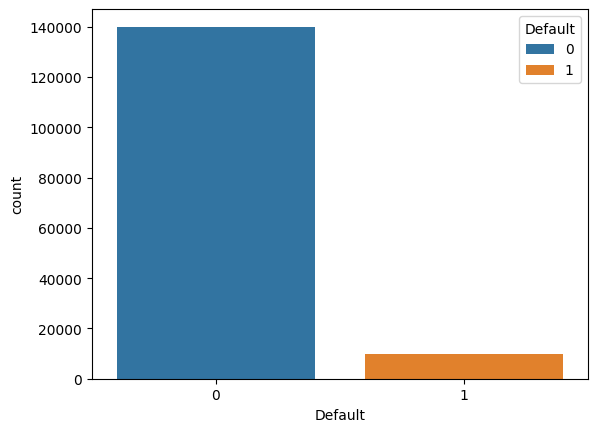

In [ ]:
sns.countplot(data = df_clase, x = "Default", hue="Default")
target_count = df_clase.Default.value_counts()



print('# No es un Cliente con más de 90 dias sin pagar su prestamo:', target_count[0])
print('# Si es un Cliente con más de 90 dias sin pagar su prestamo:', target_count[1])
print('Bad rate:', target_count[1]/(target_count[0]+target_count[1]))

#### **Se observa que el bad rate es de 0.06684 es decir el 6.684% de los clientes han dejado de pagar más de 90 días y ademas hay una diferencia notable entre la clase mayoritaria y la minoritaria**

## **Realización del Análisis Univariado**


#### Visualizamos la cantidad de nulos y sus proporciones por variable

In [ ]:
null_values = pd.concat([df_clase.isnull().sum(), df_clase.isnull().sum() / len(df_clase)], axis = 1)
null_values.rename(columns = {0: 'number_null_values',1: 'ratio_null_values'}, inplace = True)
null_values

,number_null_values,ratio_null_values
Default,0,0.000000
Prct_uso_tc,0,0.000000
Edad,0,0.000000
Nro_prestao_retrasados,0,0.000000
Prct_deuda_vs_ingresos,0,0.000000
Mto_ingreso_mensual,29731,0.198207
Nro_prod_financieros_deuda,0,0.000000
Nro_retraso_60dias,0,0.000000
Nro_creditos_hipotecarios,0,0.000000
Nro_retraso_ultm3anios,0,0.000000


#### **Se observa que las variables Mto_ingreso_mensual(19.8%) y Nro_dependiente (2.6%) tienen problemas de missing**

In [ ]:
# Mostramos sus estadísticos básicos:
df_clase.select_dtypes(include=['number']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Default,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
Prct_uso_tc,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
Edad,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
Nro_prestao_retrasados,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
Prct_deuda_vs_ingresos,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
Mto_ingreso_mensual,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
Nro_prod_financieros_deuda,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
Nro_retraso_60dias,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
Nro_creditos_hipotecarios,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
Nro_retraso_ultm3anios,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


#### Distribución de nuestras variables:

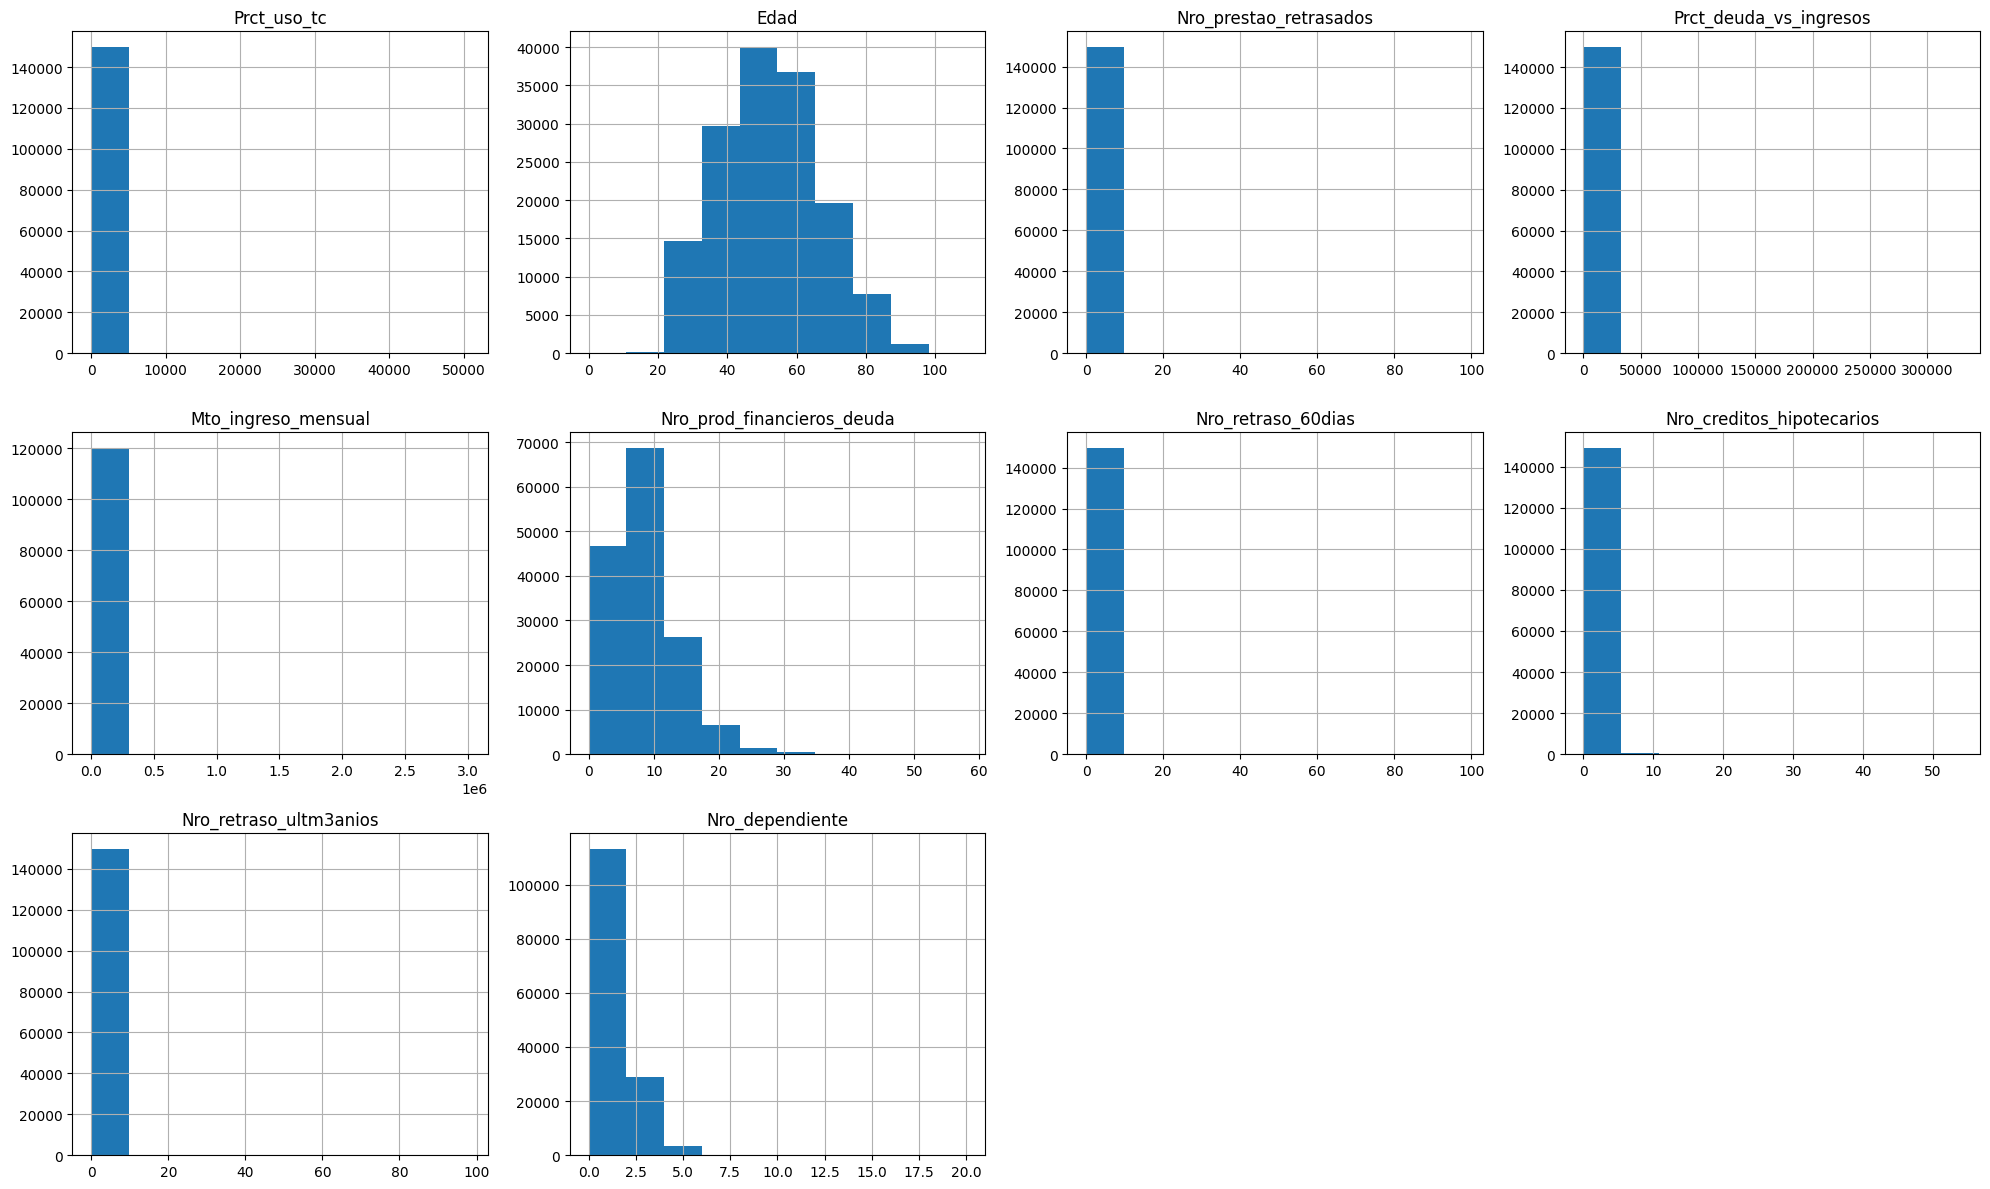

In [ ]:
# Histogramas:

df_clase.drop(columns=['Default']).hist(figsize=(20, 12), layout=(3, 4))  # Ajusta el tamaño de la figura y la disposición
plt.tight_layout()
plt.show()

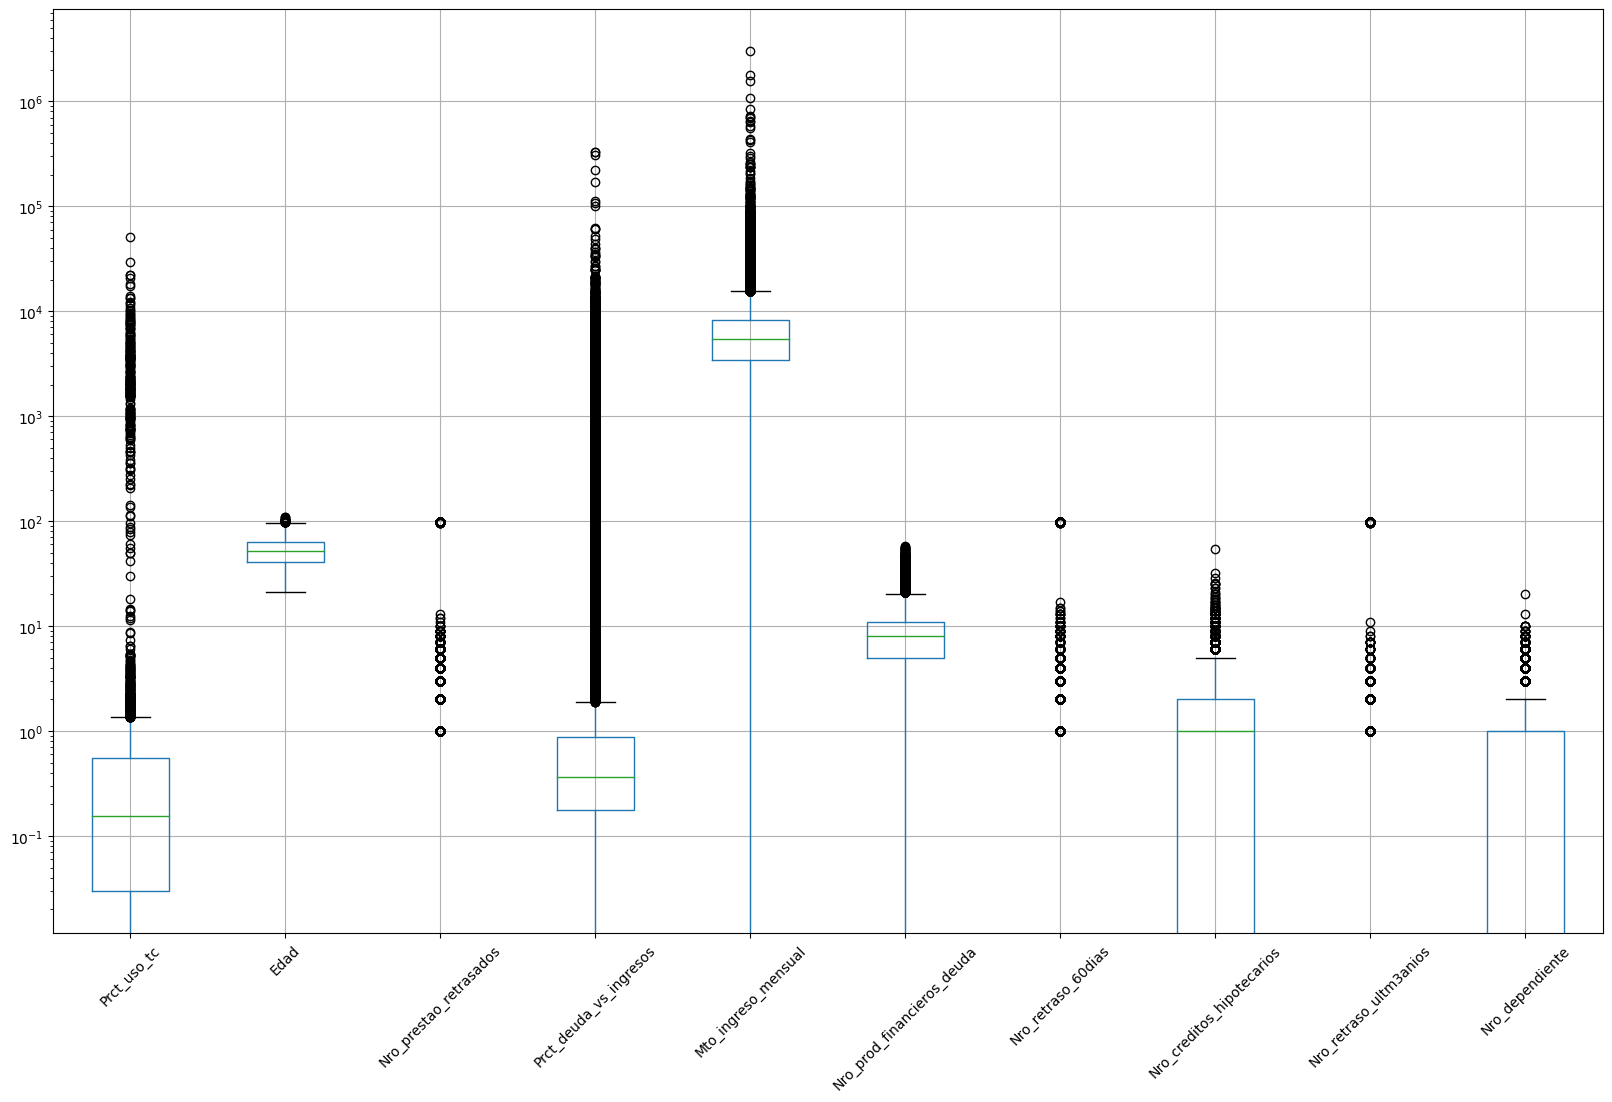

In [ ]:

#Diagrama de cajas y bigotes:
df_clase.drop(columns = ['Default']).boxplot(figsize = (20, 12))
plt.yscale('log')
plt.xticks(rotation = 45)
plt.show()

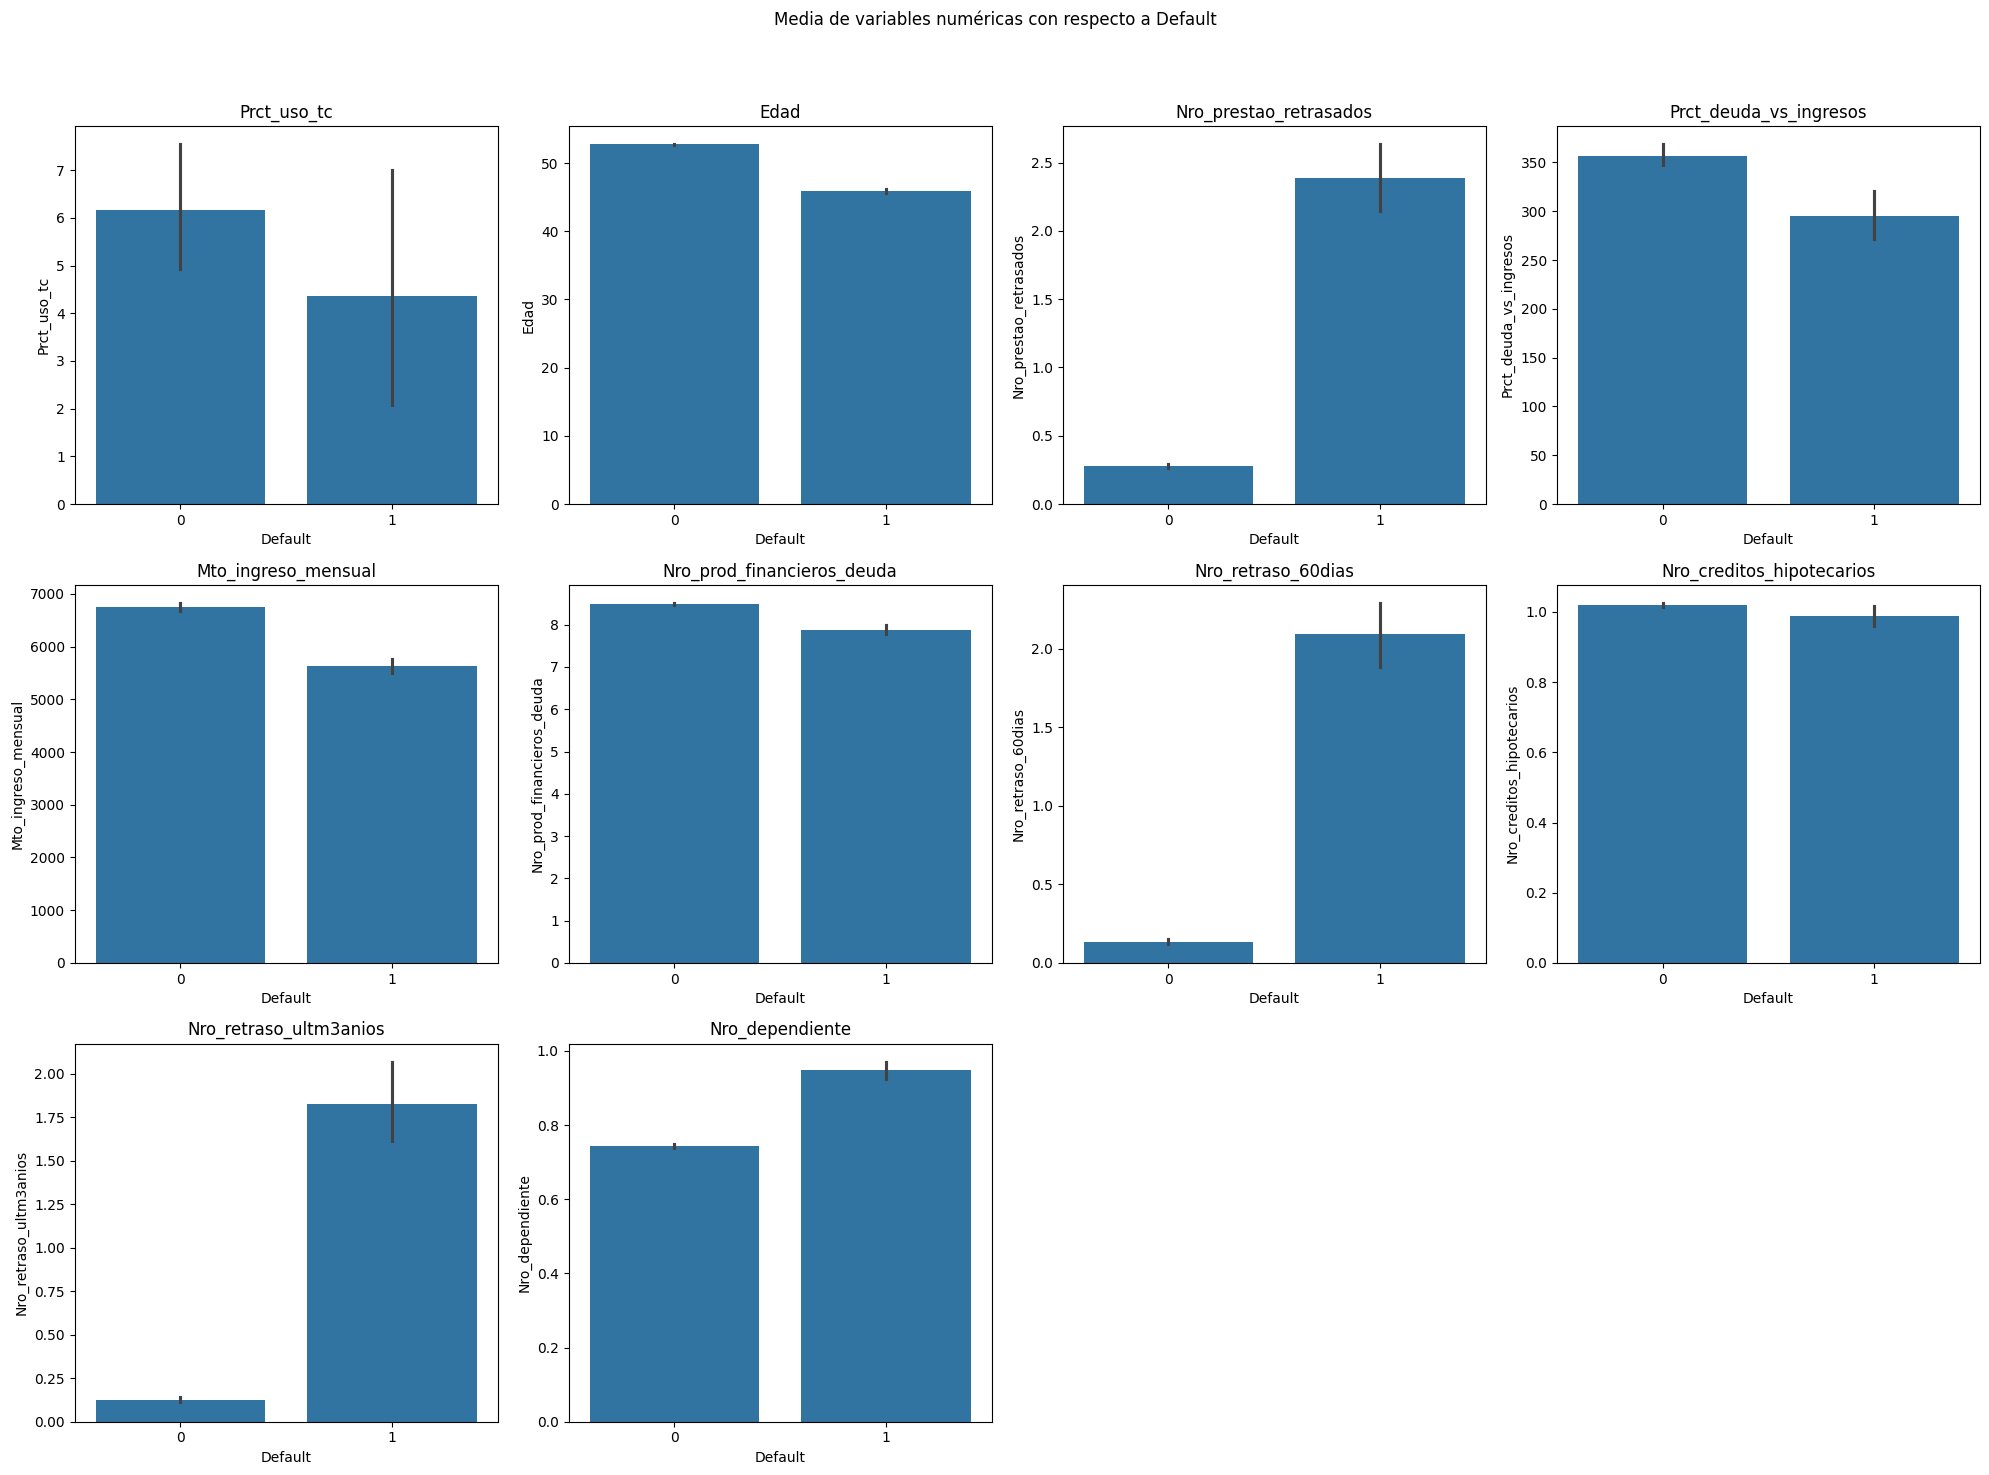

In [ ]:
# Grafico de  barras
variables = df_clase.drop(columns=['Default']).columns

num_vars = len(variables)
cols = 4  # Número de columnas en la cuadrícula de subplots
rows = (num_vars + cols - 1) // cols  # Calcular el número de filas necesarias


fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, rows * 5))
fig.suptitle('Media de variables numéricas con respecto a Default')

# Crea gráficos de barras para cada variable numérica
for var, ax in zip(variables, axes.flatten()):
    sns.barplot(x='Default', y=var, data=df_clase, ax=ax)
    ax.set_title(var)

# Elimina los subplots vacíos
for i in range(num_vars, rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## **1.2-Feature Engineering**

### **Tratamiento de Missing:**

In [ ]:
# Cargamos las librerias
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
# Instalamos la version mas reciente de la libreria feature engine ya que con otras versiones daba error
!pip install -U feature-engine

In [ ]:
# Llamemos a la librería feature engine
from feature_engine.imputation import MeanMedianImputer

### Partición de nuestra muestra en los conjuntos de Train y test. Se considerara estratificacion para asegurar que la proporción de cada clase en la variable objetivo se mantenga en ambos conjuntos.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_clase.drop("Default", axis=1), # Elimina la columna objetivo del conjunto de características
    df_clase["Default"], # Columna objetivo
    test_size=0.3, # Proporción del conjunto de prueba (30% de los datos)
    random_state=0,
    stratify=df_clase["Default"]  # Estratifica según la variable objetivo
)

X_train.shape, X_test.shape

((105000, 10), (45000, 10))

In [ ]:
# Comprobación de la proporción de Y en train
y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1])

0.06683809523809524

In [ ]:
# Comprobación de la proporción de Y en test
y_test.value_counts()[1]/(y_test.value_counts()[0]+y_test.value_counts()[1])

0.06684444444444444

In [ ]:
var_num = X_train.select_dtypes(include = ["number"])
var_num.columns

Index(['Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente'],
      dtype='object')

In [ ]:
# Revisamos el porcentaje de variables nulas
X_train.isnull().mean().where(X_train.isnull().mean()>0)

Prct_uso_tc                        NaN
Edad                               NaN
Nro_prestao_retrasados             NaN
Prct_deuda_vs_ingresos             NaN
Mto_ingreso_mensual           0.197705
Nro_prod_financieros_deuda         NaN
Nro_retraso_60dias                 NaN
Nro_creditos_hipotecarios          NaN
Nro_retraso_ultm3anios             NaN
Nro_dependiente               0.026429
dtype: float64


#### **Las variables a tratar que poseen problemas de misssing son : Mto_ingreso_mensual(19.8%) y Nro_dependiente (2.6%)**

In [ ]:
var_num.isnull().mean().where(var_num.isnull().mean()>0)

Prct_uso_tc                        NaN
Edad                               NaN
Nro_prestao_retrasados             NaN
Prct_deuda_vs_ingresos             NaN
Mto_ingreso_mensual           0.197705
Nro_prod_financieros_deuda         NaN
Nro_retraso_60dias                 NaN
Nro_creditos_hipotecarios          NaN
Nro_retraso_ultm3anios             NaN
Nro_dependiente               0.026429
dtype: float64

### Aplicando el imputador de missing usando la mediana

In [ ]:

# Crea el imputador para las variables específicas usando la mediana
imputer_1 = MeanMedianImputer(
    imputation_method='median',
    variables=['Mto_ingreso_mensual','Nro_dependiente'],
)
#  Ajusta el imputador a los datos de entrenamiento
imputer_1.fit(X_train)

MeanMedianImputer(variables=['Mto_ingreso_mensual', 'Nro_dependiente'])

In [ ]:
# Muestra las variables que fueron seleccionadas para la imputación con MeanMedianImputer
imputer_1.variables_

['Mto_ingreso_mensual', 'Nro_dependiente']

In [ ]:
# Muestra las medianas calculadas para cada una de las variables seleccionadas
imputer_1.imputer_dict_

{'Mto_ingreso_mensual': 5400.0, 'Nro_dependiente': 0.0}

In [ ]:
X_train[imputer_1.variables_].median()

Mto_ingreso_mensual    5400.0
Nro_dependiente           0.0
dtype: float64

In [ ]:

# Aplicación de la Transformación a los Conjuntos de Entrenamiento y Prueba
X_train_t = imputer_1.transform(X_train)
X_test_t = imputer_1.transform(X_test)

Verificamos si hay valores faltantes en el X_train

In [ ]:
X_train_t[imputer_1.variables_].isnull().mean()

Mto_ingreso_mensual    0.0
Nro_dependiente        0.0
dtype: float64

Verificamos si hay valores faltantes en el X_test

In [ ]:
X_test_t[imputer_1.variables_].isnull().mean()

Mto_ingreso_mensual    0.0
Nro_dependiente        0.0
dtype: float64

#### **Se observa que ya no hay valores faltantes**

###  **Grafica de la distribucion de imputadas y las originales para la variable Mto_ingreso_mensual**

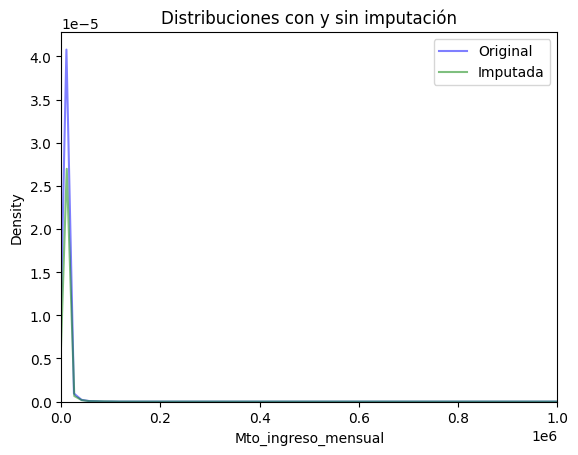

In [ ]:


fig, ax = plt.subplots()

# Gráfica de densidad para la variable original
sns.kdeplot(X_train['Mto_ingreso_mensual'], ax=ax, color='blue', label='Original', alpha=0.5)

# Gráfica de densidad para la variable imputada
sns.kdeplot(X_train_t['Mto_ingreso_mensual'], ax=ax, color='green', label='Imputada', alpha=0.5)

# Ajustar la escala del eje x para mejorar la visualización
ax.set_xlim(0, 1e6)  # Ajusta según sea necesario

# Configuración de la leyenda
ax.legend(loc='best')

# Título de la gráfica
plt.title('Distribuciones con y sin imputación')

# Mostrar la gráfica
plt.show()

###  **Grafica de la distribucion de imputadas y las originales para la variable Nro_dependiente**

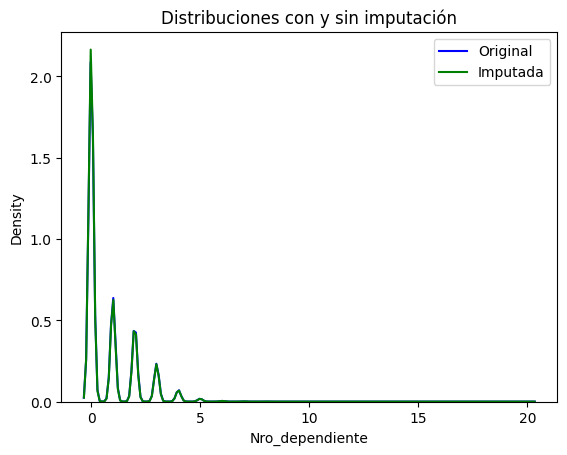

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(X_train['Nro_dependiente'], ax=ax, color='blue', label='Original')
sns.kdeplot(X_train_t['Nro_dependiente'], ax=ax, color='green', label='Imputada')
ax.legend(loc='best')
plt.title('Distribuciones con y sin imputación')
plt.show()

### **Observada las distribuciones se utilizara un método de imputación basado en un modelo para la variable Mto_ingreso_mensual**

In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn

Found existing installation: scikit-learn 1.5.1
Uninstalling scikit-learn-1.5.1:
  Successfully uninstalled scikit-learn-1.5.1
  Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.4 MB)


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

### Si marcara error al momento de usar una de las librerias, reiniciar sesion y volver a ejecutar para que tome en cuenta el upgrade a la version mas actual de las librerias y no de error

### **Aplicando el imputador de missing basado en un modelo (DecisionTreeRegressor) para la variable Mto_ingreso_mensual**

In [ ]:
# Crear el imputador usando el modelo de DecisionTreeRegressor
imputer_dt = IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),random_state=0)

In [ ]:
imputer_dt.fit(X_train[var_num.columns])

IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),
                 random_state=0)

In [ ]:
X_train_dt = imputer_dt.transform(X_train[var_num.columns])
X_test_dt = imputer_dt.transform(X_test[var_num.columns])

In [ ]:
X_train_dt = pd.DataFrame(X_train_dt, columns = var_num.columns)
X_test_dt = pd.DataFrame(X_test_dt, columns = var_num.columns)

###  **Grafica de la distribucion imputadas por modelo y originales para la variable Mto_ingreso_mensual**

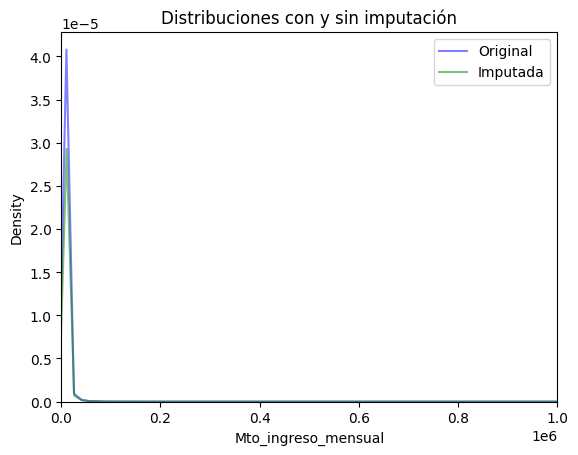

In [ ]:

# Grafiquemos las variables imputadas y las originales para "Mto_ingreso_mensual"
fig, ax = plt.subplots()

# Gráfica de densidad para la variable original
sns.kdeplot(X_train['Mto_ingreso_mensual'], ax=ax, color='blue', label='Original', alpha=0.5)

# Gráfica de densidad para la variable imputada
sns.kdeplot(X_train_dt['Mto_ingreso_mensual'], ax=ax, color='green', label='Imputada', alpha=0.5)

# Ajustar la escala del eje x para mejorar la visualización
ax.set_xlim(0, 1e6)  # Ajusta según sea necesario

# Configuración de la leyenda
ax.legend(loc='best')

# Título de la gráfica
plt.title('Distribuciones con y sin imputación')

# Mostrar la gráfica
plt.show()

### **Comparando la dstribuciones cuando se imputa con mediana y cuando se imputa con un modelo**

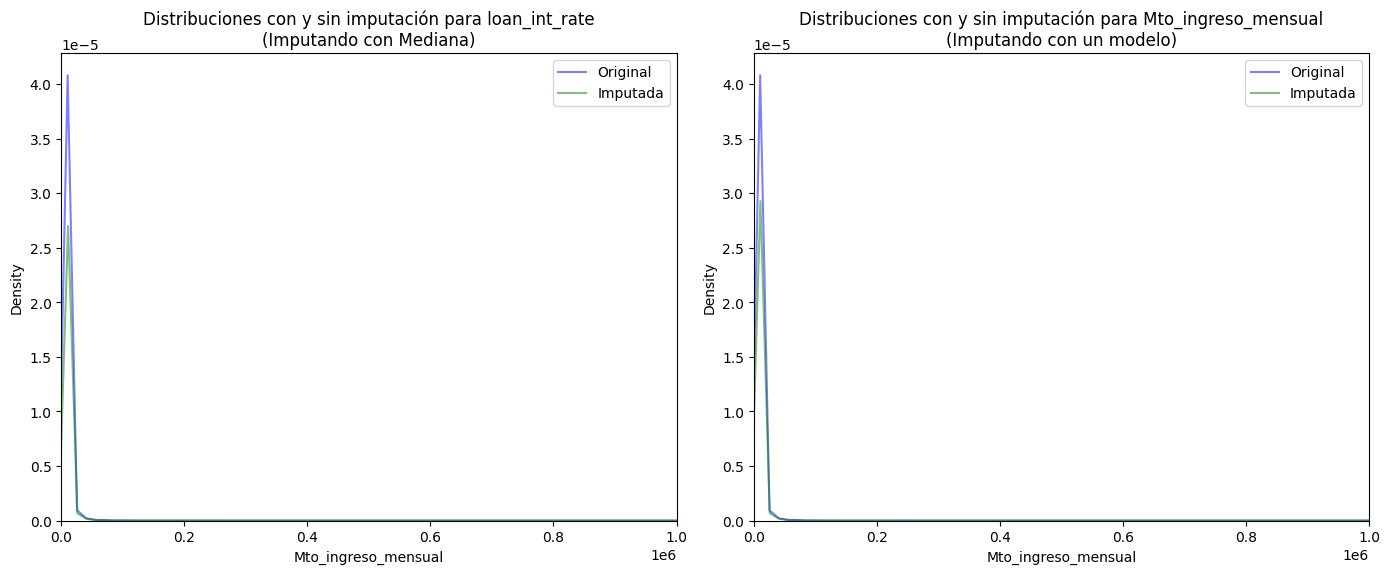

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfica cuando se imputa por mediana"
sns.kdeplot(X_train['Mto_ingreso_mensual'], ax=axes[0], color='blue', label='Original', alpha=0.5)
sns.kdeplot(X_train_t['Mto_ingreso_mensual'], ax=axes[0], color='green', label='Imputada', alpha=0.5)
axes[0].set_xlim(0, 1e6)  # Ajusta según sea necesario
axes[0].legend(loc='best')
axes[0].set_title('Distribuciones con y sin imputación para loan_int_rate\n(Imputando con Mediana)')

# Gráfica cuando se imputa por modelo"
sns.kdeplot(X_train['Mto_ingreso_mensual'], ax=axes[1], color='blue', label='Original', alpha=0.5)
sns.kdeplot(X_train_dt['Mto_ingreso_mensual'], ax=axes[1], color='green', label='Imputada', alpha=0.5)
axes[1].set_xlim(0, 1e6)  # Ajusta según sea necesario
axes[1].legend(loc='best')
axes[1].set_title('Distribuciones con y sin imputación para Mto_ingreso_mensual\n(Imputando con un modelo)')

# Ajustar el espaciado entre los subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Mostrar las gráficas
plt.tight_layout()
plt.show()

### **Se observa que la imputacion con un modelo es mejor para la  variable Mto_ingreso_mensual, por cual sera incluida en nuestro pipeline que crearemos a continuacion**

## Creamos nuestro pipeline para concatenar los diferentes métodos de imputación que estamos usando

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
pipe = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['Nro_dependiente'])
        ),
         (   "dt_imputer",
            ColumnTransformer(transformers=[('e', IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),random_state=0), ['Mto_ingreso_mensual'])],
                              remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")

        )
    ]
)

In [ ]:
pipe.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['Nro_dependiente'])),
                ('dt_imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('e',
                                                  IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),
                                                                   random_state=0),
                                                  ['Mto_ingreso_mensual'])],
                                   verbose_feature_names_out=False))])

In [ ]:
# Aplicación de la Transformación a los Conjuntos de Entrenamiento y Prueba
X_train_t_p = pipe.transform(X_train)
X_test_t_p = pipe.transform(X_test)


Verificamos que no queden valores faltantes

In [ ]:
X_train_t_p.isnull().mean()

Mto_ingreso_mensual           0.0
Prct_uso_tc                   0.0
Edad                          0.0
Nro_prestao_retrasados        0.0
Prct_deuda_vs_ingresos        0.0
Nro_prod_financieros_deuda    0.0
Nro_retraso_60dias            0.0
Nro_creditos_hipotecarios     0.0
Nro_retraso_ultm3anios        0.0
Nro_dependiente               0.0
dtype: float64

In [ ]:
X_test_t_p.isnull().mean()

Mto_ingreso_mensual           0.0
Prct_uso_tc                   0.0
Edad                          0.0
Nro_prestao_retrasados        0.0
Prct_deuda_vs_ingresos        0.0
Nro_prod_financieros_deuda    0.0
Nro_retraso_60dias            0.0
Nro_creditos_hipotecarios     0.0
Nro_retraso_ultm3anios        0.0
Nro_dependiente               0.0
dtype: float64

In [ ]:
X_train_t_p.describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
Edad,105000.0,52.257333,14.757197,0.0,41.000000,52.000000,63.000000,109.0
Mto_ingreso_mensual,105000.0,6692.220486,13799.739605,0.0,3916.000000,6583.000000,7383.000000,3008750.0
Nro_creditos_hipotecarios,105000.0,1.020057,1.136004,0.0,0.000000,1.000000,2.000000,54.0
Nro_dependiente,105000.0,0.739590,1.110803,0.0,0.000000,0.000000,1.000000,20.0
Nro_prestao_retrasados,105000.0,0.418276,4.166897,0.0,0.000000,0.000000,0.000000,98.0
Nro_prod_financieros_deuda,105000.0,8.449914,5.153014,0.0,5.000000,8.000000,11.000000,58.0
Nro_retraso_60dias,105000.0,0.263886,4.143683,0.0,0.000000,0.000000,0.000000,98.0
Nro_retraso_ultm3anios,105000.0,0.237390,4.128927,0.0,0.000000,0.000000,0.000000,98.0
Prct_deuda_vs_ingresos,105000.0,349.751674,2006.431906,0.0,0.175941,0.366923,0.864635,326442.0
Prct_uso_tc,105000.0,5.819674,257.063237,0.0,0.029666,0.153984,0.556816,50708.0


## **Tratamiento de outliers**

In [ ]:
def outliers_col(df):
    for columna in df:
        if df[columna].dtype != object:  # Verifica si la columna no es de tipo objeto (es decir, es numérica)
            q1 = stats.scoreatpercentile(df[columna], 25)  # Calcula el primer cuartil (Q1)
            q3 = stats.scoreatpercentile(df[columna], 75)  # Calcula el tercer cuartil (Q3)
            iqr = q3 - q1  # Calcula el rango intercuartílico (IQR)
            lim_inf = q1 - 1.5 * iqr  # Límite inferior para los outliers
            lim_sup = q3 + 1.5 * iqr  # Límite superior para los outliers
            n_outliers_inf = len(df[(df[columna] < lim_inf)])  # Cuenta los outliers por debajo del límite inferior
            n_outliers_sup = len(df[(df[columna] > lim_sup)])  # Cuenta los outliers por encima del límite superior
            print("{} | {} | {}".format(
                df[columna].name,  # Nombre de la columna
                n_outliers_inf,    # Número de outliers inferiores
                n_outliers_sup     # Número de outliers superiores
            ))

In [ ]:
outliers_col(X_train_t_p)

Mto_ingreso_mensual | 0 | 6451
Prct_uso_tc | 0 | 535
Edad | 1 | 28
Nro_prestao_retrasados | 0 | 16749
Prct_deuda_vs_ingresos | 0 | 21880
Nro_prod_financieros_deuda | 0 | 2797
Nro_retraso_60dias | 0 | 5803
Nro_creditos_hipotecarios | 0 | 568
Nro_retraso_ultm3anios | 0 | 5302
Nro_dependiente | 0 | 9408


### Revisando los casos, vamos a tratar los outliers de **Mto_ingreso_mensual** , **Prct_uso_tc** , **Prct_deuda_vs_ingresos** , **Nro_retraso_60dias** , **Nro_creditos_hipotecarios** , **Nro_retraso_ultm3anios** , **Nro_dependiente**,**Nro_prestao_retrasados** sobre su cola derecha, y **Edad** sobre sus dos colas.

#### **La variable Nro_prod_financieros_deuda no se esta considerando porque su valor maximo es razonable**

In [ ]:
from feature_engine.outliers import Winsorizer
capper_1 = Winsorizer(
    variables=['Mto_ingreso_mensual' , 'Prct_uso_tc' , 'Prct_deuda_vs_ingresos' , 'Nro_retraso_60dias' , 'Nro_creditos_hipotecarios' , 'Nro_retraso_ultm3anios' , 'Nro_dependiente', 'Nro_prestao_retrasados'],
    capping_method="quantiles",
    tail="right",
    fold=0.01,
)
capper_1.fit(X_train_t_p)

Winsorizer(capping_method='quantiles', fold=0.01,
           variables=['Mto_ingreso_mensual', 'Prct_uso_tc',
                      'Prct_deuda_vs_ingresos', 'Nro_retraso_60dias',
                      'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
                      'Nro_dependiente', 'Nro_prestao_retrasados'])

In [ ]:
X_train_t_p2 = capper_1.transform(X_train_t_p)
X_test_t_p2 = capper_1.transform(X_test_t_p)

In [ ]:
capper_2 = Winsorizer(
    variables=['Edad'],
    capping_method="quantiles",
    tail="both",
    fold=0.01,
)
capper_2.fit(X_train_t_p2)

Winsorizer(capping_method='quantiles', fold=0.01, tail='both',
           variables=['Edad'])

In [ ]:
X_train_t_p3 = capper_2.transform(X_train_t_p2)
X_test_t_p3 = capper_2.transform(X_test_t_p2)

In [ ]:
X_train_t_p3.describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
Edad,105000.0,52.241762,14.653539,24.0,41.000000,52.000000,63.000000,87.000000
Mto_ingreso_mensual,105000.0,6397.484001,3827.197482,0.0,3916.000000,6583.000000,7383.000000,23200.000000
Nro_creditos_hipotecarios,105000.0,1.003752,1.019410,0.0,0.000000,1.000000,2.000000,5.000000
Nro_dependiente,105000.0,0.730105,1.072867,0.0,0.000000,0.000000,1.000000,4.000000
Nro_prestao_retrasados,105000.0,0.245352,0.666245,0.0,0.000000,0.000000,0.000000,4.000000
Nro_prod_financieros_deuda,105000.0,8.449914,5.153014,0.0,5.000000,8.000000,11.000000,58.000000
Nro_retraso_60dias,105000.0,0.086419,0.402681,0.0,0.000000,0.000000,0.000000,3.000000
Nro_retraso_ultm3anios,105000.0,0.062552,0.287671,0.0,0.000000,0.000000,0.000000,2.000000
Prct_deuda_vs_ingresos,105000.0,313.921298,900.998051,0.0,0.175941,0.366923,0.864635,4949.020000
Prct_uso_tc,105000.0,0.319791,0.351703,0.0,0.029666,0.153984,0.556816,1.092097


In [ ]:
X_test_t_p3.describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
Edad,45000.0,52.366756,14.701828,24.0,41.000000,52.000000,63.000000,87.000000
Mto_ingreso_mensual,45000.0,6407.743605,3834.410513,0.0,3900.000000,6616.500000,7400.000000,23200.000000
Nro_creditos_hipotecarios,45000.0,0.999511,1.022383,0.0,0.000000,1.000000,2.000000,5.000000
Nro_dependiente,45000.0,0.723556,1.064708,0.0,0.000000,0.000000,1.000000,4.000000
Nro_prestao_retrasados,45000.0,0.247044,0.668149,0.0,0.000000,0.000000,0.000000,4.000000
Nro_prod_financieros_deuda,45000.0,8.459400,5.129484,0.0,5.000000,8.000000,11.000000,57.000000
Nro_retraso_60dias,45000.0,0.086644,0.399314,0.0,0.000000,0.000000,0.000000,3.000000
Nro_retraso_ultm3anios,45000.0,0.064644,0.295711,0.0,0.000000,0.000000,0.000000,2.000000
Prct_deuda_vs_ingresos,45000.0,321.670413,915.605829,0.0,0.172846,0.365317,0.878229,4949.020000
Prct_uso_tc,45000.0,0.322111,0.353134,0.0,0.030427,0.154614,0.564945,1.092097


### **Escalado de las variables**




In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().set_output(transform="pandas")
scaler.fit(X_train_t_p3[var_num.columns])
X_train_t_p4 = scaler.transform(X_train_t_p3[var_num.columns])
X_test_t_p4 = scaler.transform(X_test_t_p3[var_num.columns])

In [ ]:
X_train_t_p4.describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
Edad,105000.0,0.010989,0.666070,-1.272727,-0.500000,0.000000e+00,0.500000,1.590909
Mto_ingreso_mensual,105000.0,-0.053509,1.103893,-1.898760,-0.769253,0.000000e+00,0.230747,4.792905
Nro_creditos_hipotecarios,105000.0,0.001876,0.509705,-0.500000,-0.500000,0.000000e+00,0.500000,2.000000
Nro_dependiente,105000.0,0.730105,1.072867,0.000000,0.000000,0.000000e+00,1.000000,4.000000
Nro_prestao_retrasados,105000.0,0.245352,0.666245,0.000000,0.000000,0.000000e+00,0.000000,4.000000
Nro_prod_financieros_deuda,105000.0,0.074986,0.858836,-1.333333,-0.500000,0.000000e+00,0.500000,8.333333
Nro_retraso_60dias,105000.0,0.086419,0.402681,0.000000,0.000000,0.000000e+00,0.000000,3.000000
Nro_retraso_ultm3anios,105000.0,0.062552,0.287671,0.000000,0.000000,0.000000e+00,0.000000,2.000000
Prct_deuda_vs_ingresos,105000.0,455.288197,1308.269985,-0.532780,-0.277310,0.000000e+00,0.722690,7185.558594
Prct_uso_tc,105000.0,0.314536,0.667179,-0.292107,-0.235830,-2.632610e-17,0.764170,1.779596


### Actualizamos nuestro pipeline

In [ ]:
var_num.columns

Index(['Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente'],
      dtype='object')

In [ ]:
pipe_2 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['Nro_dependiente'])
        ),
         (   "dt_imputer",
            ColumnTransformer(transformers=[('e', IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),random_state=0), ['Mto_ingreso_mensual'])],
                              remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")

        ),
        (
            "capper_1",
         Winsorizer(variables=['Mto_ingreso_mensual' , 'Prct_uso_tc' , 'Prct_deuda_vs_ingresos' , 'Nro_retraso_60dias' , 'Nro_creditos_hipotecarios' , 'Nro_retraso_ultm3anios' , 'Nro_dependiente', 'Nro_prestao_retrasados'],capping_method="quantiles",tail="right",fold=0.01)
        ),
        (
            "capper_2",
         Winsorizer(variables=['Edad'], capping_method="quantiles", tail="both", fold=0.01)
        ),
        (   "scaler",
            ColumnTransformer(transformers=[('e', RobustScaler(), ['Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente'])],
                              remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")
        )


    ]
)

In [ ]:
pipe_2.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['Nro_dependiente'])),
                ('dt_imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('e',
                                                  IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),
                                                                   random_state=0),
                                                  ['Mto_ingreso_mensual'])],
                                   verbose_feature_names_out=False)),
                ('capper_1',
                 Winsorizer(capping_method='quantiles',...
                            variables=['Edad'])),
                ('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('e', RobustScaler(),
                                                  ['Prct_uso_tc', 'Edad',
                                                   'Nro_prestao_retrasados',
                                                   'Prct_deuda_vs_ingresos',
                                                   'Mto_ingreso_mensual',
                                                   'Nro_prod_financieros_deuda',
                                                   'Nro_retraso_60dias',
                                                   'Nro_creditos_hipotecarios',
                                                   'Nro_retraso_ultm3anios',
                                                   'Nro_dependiente'])],
                                   verbose_feature_names_out=False))])

In [ ]:
X_train_t_p5 = pipe_2.transform(X_train)
X_test_t_p5 = pipe_2.transform(X_test)

In [ ]:
X_train_t_p4.describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
Edad,105000.0,0.010989,0.666070,-1.272727,-0.500000,0.000000e+00,0.500000,1.590909
Mto_ingreso_mensual,105000.0,-0.053509,1.103893,-1.898760,-0.769253,0.000000e+00,0.230747,4.792905
Nro_creditos_hipotecarios,105000.0,0.001876,0.509705,-0.500000,-0.500000,0.000000e+00,0.500000,2.000000
Nro_dependiente,105000.0,0.730105,1.072867,0.000000,0.000000,0.000000e+00,1.000000,4.000000
Nro_prestao_retrasados,105000.0,0.245352,0.666245,0.000000,0.000000,0.000000e+00,0.000000,4.000000
Nro_prod_financieros_deuda,105000.0,0.074986,0.858836,-1.333333,-0.500000,0.000000e+00,0.500000,8.333333
Nro_retraso_60dias,105000.0,0.086419,0.402681,0.000000,0.000000,0.000000e+00,0.000000,3.000000
Nro_retraso_ultm3anios,105000.0,0.062552,0.287671,0.000000,0.000000,0.000000e+00,0.000000,2.000000
Prct_deuda_vs_ingresos,105000.0,455.288197,1308.269985,-0.532780,-0.277310,0.000000e+00,0.722690,7185.558594
Prct_uso_tc,105000.0,0.314536,0.667179,-0.292107,-0.235830,-2.632610e-17,0.764170,1.779596


In [ ]:
X_train_t_p5.describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
Edad,105000.0,0.010989,0.666070,-1.272727,-0.500000,0.000000e+00,0.500000,1.590909
Mto_ingreso_mensual,105000.0,-0.053509,1.103893,-1.898760,-0.769253,0.000000e+00,0.230747,4.792905
Nro_creditos_hipotecarios,105000.0,0.001876,0.509705,-0.500000,-0.500000,0.000000e+00,0.500000,2.000000
Nro_dependiente,105000.0,0.730105,1.072867,0.000000,0.000000,0.000000e+00,1.000000,4.000000
Nro_prestao_retrasados,105000.0,0.245352,0.666245,0.000000,0.000000,0.000000e+00,0.000000,4.000000
Nro_prod_financieros_deuda,105000.0,0.074986,0.858836,-1.333333,-0.500000,0.000000e+00,0.500000,8.333333
Nro_retraso_60dias,105000.0,0.086419,0.402681,0.000000,0.000000,0.000000e+00,0.000000,3.000000
Nro_retraso_ultm3anios,105000.0,0.062552,0.287671,0.000000,0.000000,0.000000e+00,0.000000,2.000000
Prct_deuda_vs_ingresos,105000.0,455.288197,1308.269985,-0.532780,-0.277310,0.000000e+00,0.722690,7185.558594
Prct_uso_tc,105000.0,0.314536,0.667179,-0.292107,-0.235830,-2.632610e-17,0.764170,1.779596


## **Feature Selection**
#### **(Determinaremos la aportacion de cada variable)**

In [ ]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

In [ ]:
disc1 = EqualFrequencyDiscretiser(q=10,variables=list(var_num.columns),return_boundaries=True)
disc1.fit(X_train_t_p5[var_num.columns])

EqualFrequencyDiscretiser(return_boundaries=True,
                          variables=['Prct_uso_tc', 'Edad',
                                     'Nro_prestao_retrasados',
                                     'Prct_deuda_vs_ingresos',
                                     'Mto_ingreso_mensual',
                                     'Nro_prod_financieros_deuda',
                                     'Nro_retraso_60dias',
                                     'Nro_creditos_hipotecarios',
                                     'Nro_retraso_ultm3anios',
                                     'Nro_dependiente'])

In [ ]:
X_train_t_p5_numdisc=disc1.transform(X_train_t_p5[var_num.columns])
X_test_t_p5_numdisc=disc1.transform(X_test_t_p5[var_num.columns])

In [ ]:
X_train_t_p5_numdisc.head()

,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
70904,"(-0.21, -0.135]","(0.364, 0.591]","(-inf, 1.0]","(-0.337, -0.222]","(-0.918, -0.649]","(0.0, 0.167]","(-inf, inf]","(-inf, 0.0]","(-inf, inf]","(-inf, 1.0]"
63717,"(-0.287, -0.256]","(0.591, 0.909]","(-inf, 1.0]","(5.275, 1821.756]","(0.0, 0.0315]","(0.0, 0.167]","(-inf, inf]","(-inf, 0.0]","(-inf, inf]","(-inf, 1.0]"
88897,"(0.549, 1.029]","(-0.864, -0.591]","(-inf, 1.0]","(-0.222, -0.115]","(-0.649, -0.344]","(-0.5, -0.333]","(-inf, inf]","(-inf, 0.0]","(-inf, inf]","(-inf, 1.0]"
56330,"(-inf, -0.287]","(0.364, 0.591]","(-inf, 1.0]","(5.275, 1821.756]","(0.0, 0.0315]","(-inf, -0.833]","(-inf, inf]","(-inf, 0.0]","(-inf, inf]","(-inf, 1.0]"
84825,"(-2.63e-17, 0.221]","(-0.182, 0.0]","(-inf, 1.0]","(0.0, 0.145]","(-0.649, -0.344]","(0.333, 0.667]","(-inf, inf]","(0.0, 0.5]","(-inf, inf]","(2.0, inf]"


In [ ]:
tot_train_t=pd.concat([X_train_t_p5_numdisc, y_train], axis=1)
tot_train_t.head()

,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Default
70904,"(-0.21, -0.135]","(0.364, 0.591]","(-inf, 1.0]","(-0.337, -0.222]","(-0.918, -0.649]","(0.0, 0.167]","(-inf, inf]","(-inf, 0.0]","(-inf, inf]","(-inf, 1.0]",0
63717,"(-0.287, -0.256]","(0.591, 0.909]","(-inf, 1.0]","(5.275, 1821.756]","(0.0, 0.0315]","(0.0, 0.167]","(-inf, inf]","(-inf, 0.0]","(-inf, inf]","(-inf, 1.0]",0
88897,"(0.549, 1.029]","(-0.864, -0.591]","(-inf, 1.0]","(-0.222, -0.115]","(-0.649, -0.344]","(-0.5, -0.333]","(-inf, inf]","(-inf, 0.0]","(-inf, inf]","(-inf, 1.0]",0
56330,"(-inf, -0.287]","(0.364, 0.591]","(-inf, 1.0]","(5.275, 1821.756]","(0.0, 0.0315]","(-inf, -0.833]","(-inf, inf]","(-inf, 0.0]","(-inf, inf]","(-inf, 1.0]",0
84825,"(-2.63e-17, 0.221]","(-0.182, 0.0]","(-inf, 1.0]","(0.0, 0.145]","(-0.649, -0.344]","(0.333, 0.667]","(-inf, inf]","(0.0, 0.5]","(-inf, inf]","(2.0, inf]",0


In [ ]:
tot_train_t.shape, X_train_t_p5_numdisc.shape,  y_train.shape

((105000, 11), (105000, 10), (105000,))

In [ ]:
def calculate_woe_iv(dataset, feature_cat, target):
    lst = []
    feature=feature_cat
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return iv, dset

In [ ]:
def getFeatureIV_Importance(df,features,target):
    featureIV_Importance=list()
    for v in features:
      iv, rep=calculate_woe_iv(df,v,target)
      featureIV_Importance.append(iv)
    display(pd.DataFrame({"Feature":features, "IV":featureIV_Importance}).sort_values("IV",ascending=False))

In [ ]:
getFeatureIV_Importance(tot_train_t,tot_train_t.columns,"Default")

,Feature,IV
0,Prct_uso_tc,1.110944
2,Nro_prestao_retrasados,0.458671
1,Edad,0.252157
4,Mto_ingreso_mensual,0.073714
3,Prct_deuda_vs_ingresos,0.072693
5,Nro_prod_financieros_deuda,0.064638
9,Nro_dependiente,0.020714
7,Nro_creditos_hipotecarios,0.013098
6,Nro_retraso_60dias,0.000000
8,Nro_retraso_ultm3anios,0.000000


### Observados los resultados del IV nos quedamos con las variables que tengan un IV mayor a 2% (que es el umbral mínimo) y las que tienen menor o igual al 50% (umbral máximo antes de ser considerado sospechosa) **en esta ocasion eliminaremos las variable Prct_uso_tc, Nro_creditos_hipotecarios, Nro_retraso_60dias y Nro_retraso_ultm3anios**

In [ ]:
sel_vars=['Nro_prestao_retrasados', 'Edad', 'Mto_ingreso_mensual' ,'Prct_deuda_vs_ingresos' , 'Nro_prod_financieros_deuda', 'Nro_dependiente']

#### **Revisemos como se ven las relaciones entre los atributos de cada variable y el log(odds) o WOE**

In [ ]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('WOE')
    plt.title(str('WOE por ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

In [ ]:
IV_v1, ReporteWoe_v1=calculate_woe_iv(tot_train_t, 'Nro_prestao_retrasados', 'Default')

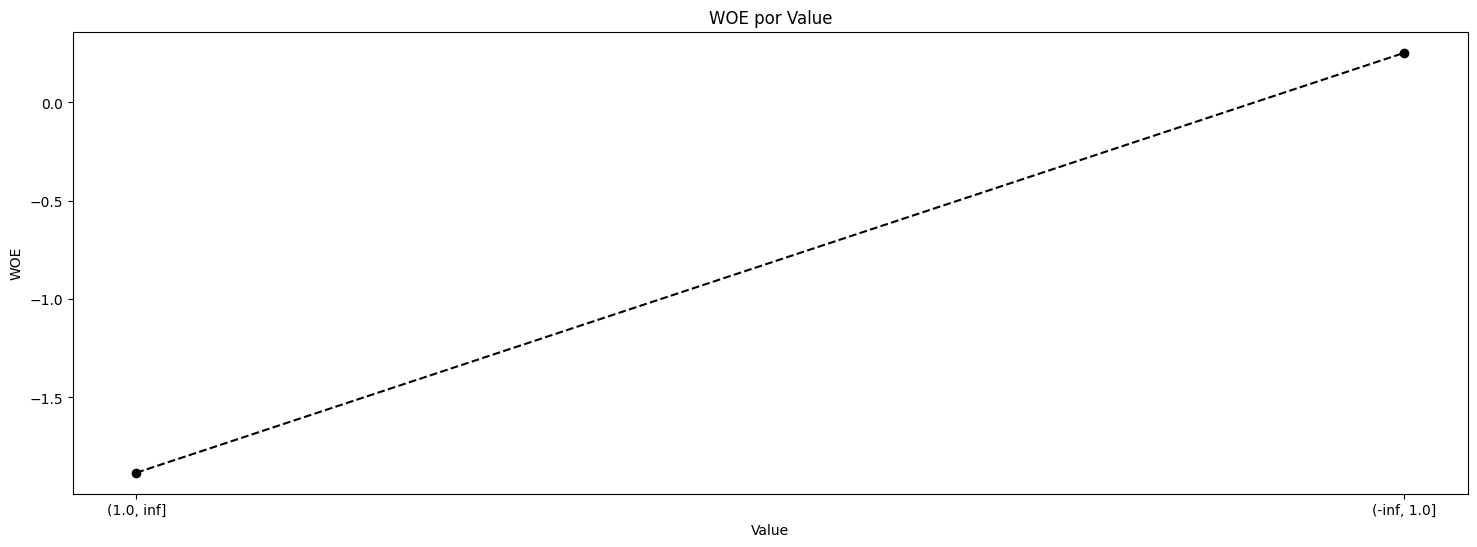

In [ ]:
plot_by_woe(ReporteWoe_v1)

In [ ]:
IV_v2, ReporteWoe_v2=calculate_woe_iv(tot_train_t, 'Edad', 'Default')

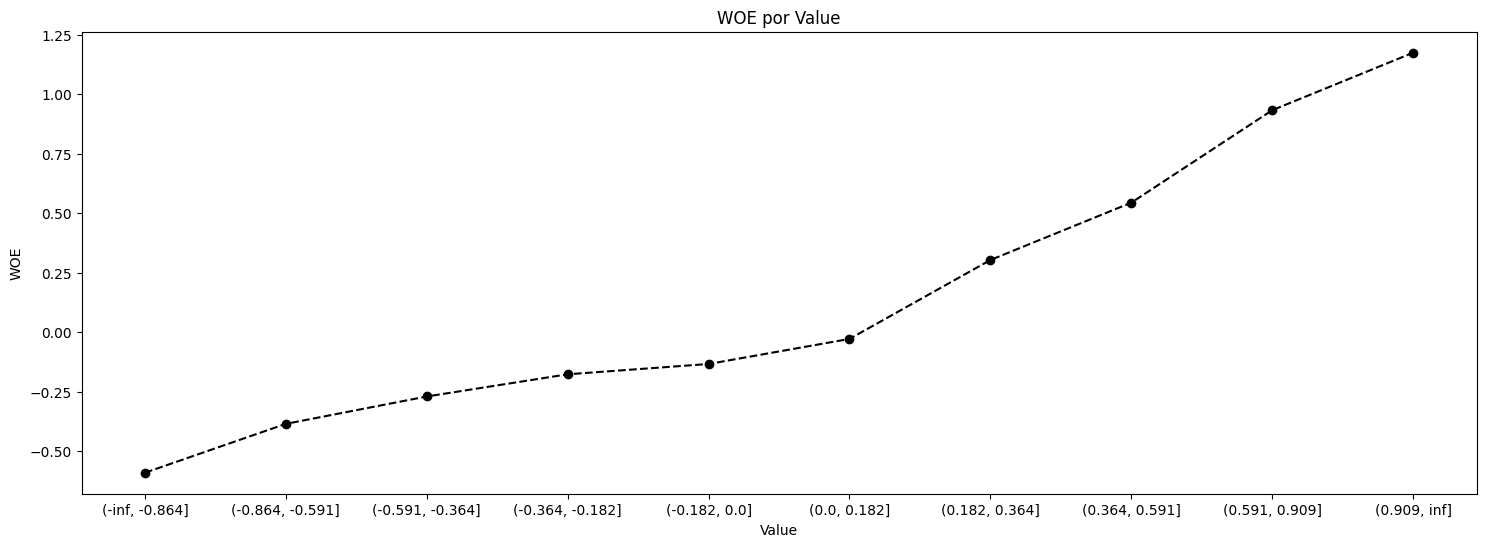

In [ ]:
plot_by_woe(ReporteWoe_v2)

In [ ]:
IV_v3, ReporteWoe_v3=calculate_woe_iv(tot_train_t, 'Mto_ingreso_mensual', 'Default')

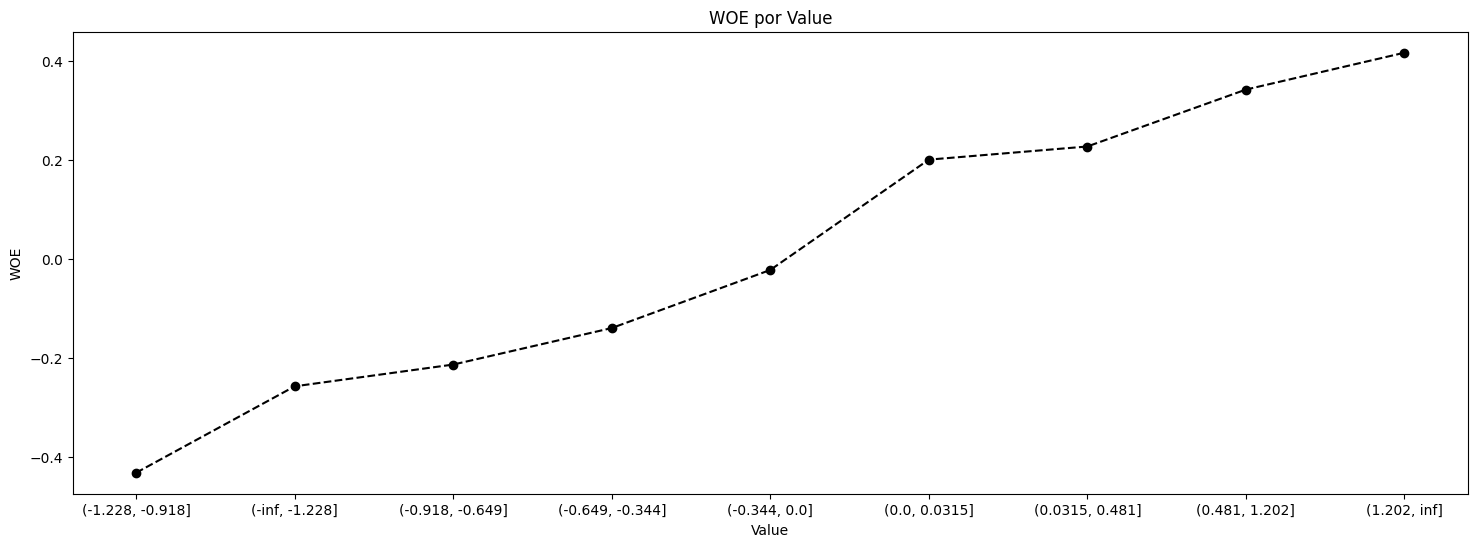

In [ ]:
plot_by_woe(ReporteWoe_v3)

In [ ]:
IV_v4, ReporteWoe_v4=calculate_woe_iv(tot_train_t, 'Prct_deuda_vs_ingresos', 'Default')

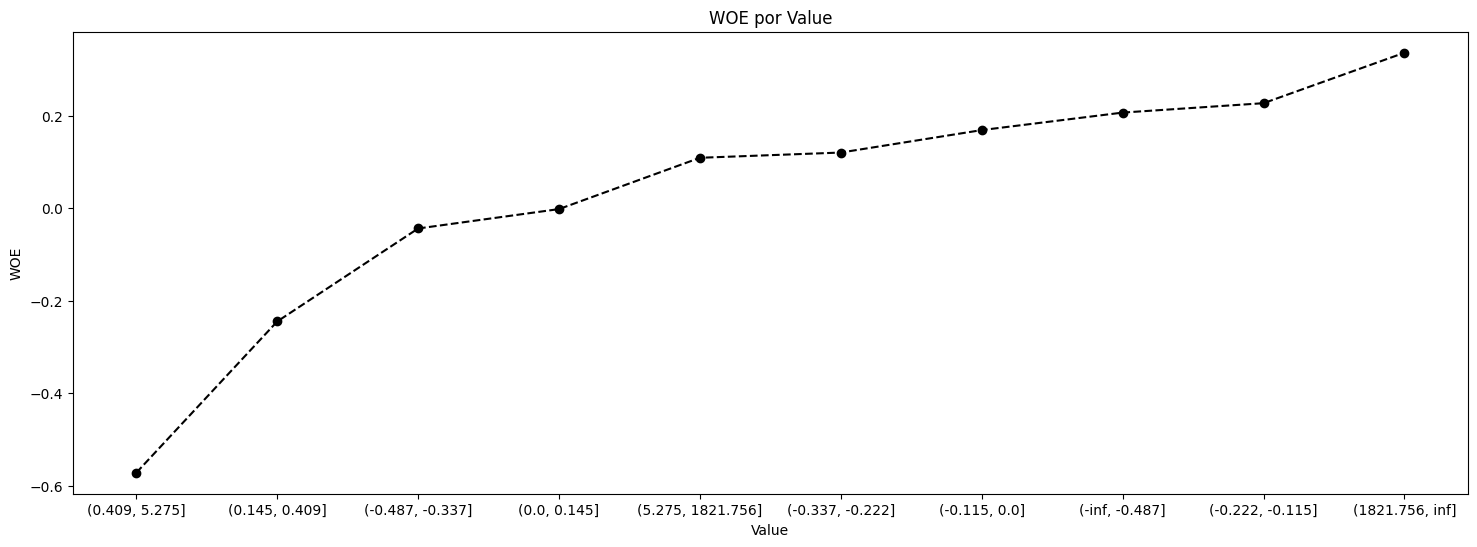

In [ ]:
plot_by_woe(ReporteWoe_v4)

In [ ]:
IV_v5, ReporteWoe_v5=calculate_woe_iv(tot_train_t, 'Nro_prod_financieros_deuda', 'Default')

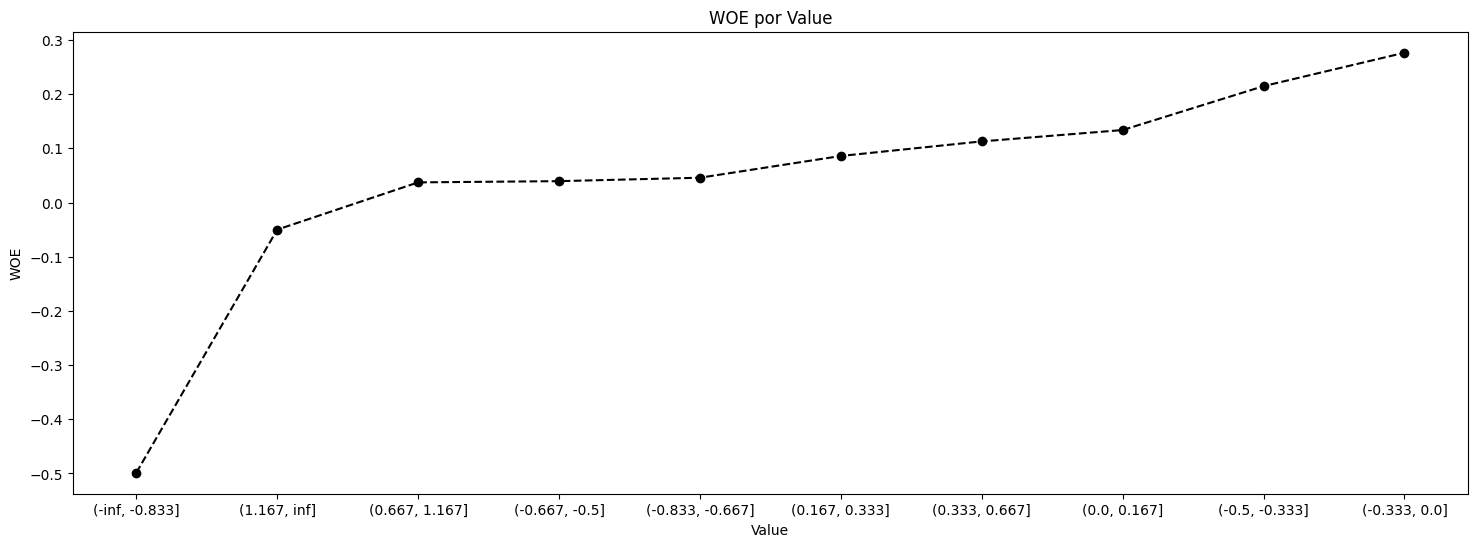

In [ ]:
plot_by_woe(ReporteWoe_v5)

In [ ]:
IV_v6, ReporteWoe_v6=calculate_woe_iv(tot_train_t, 'Nro_dependiente', 'Default')

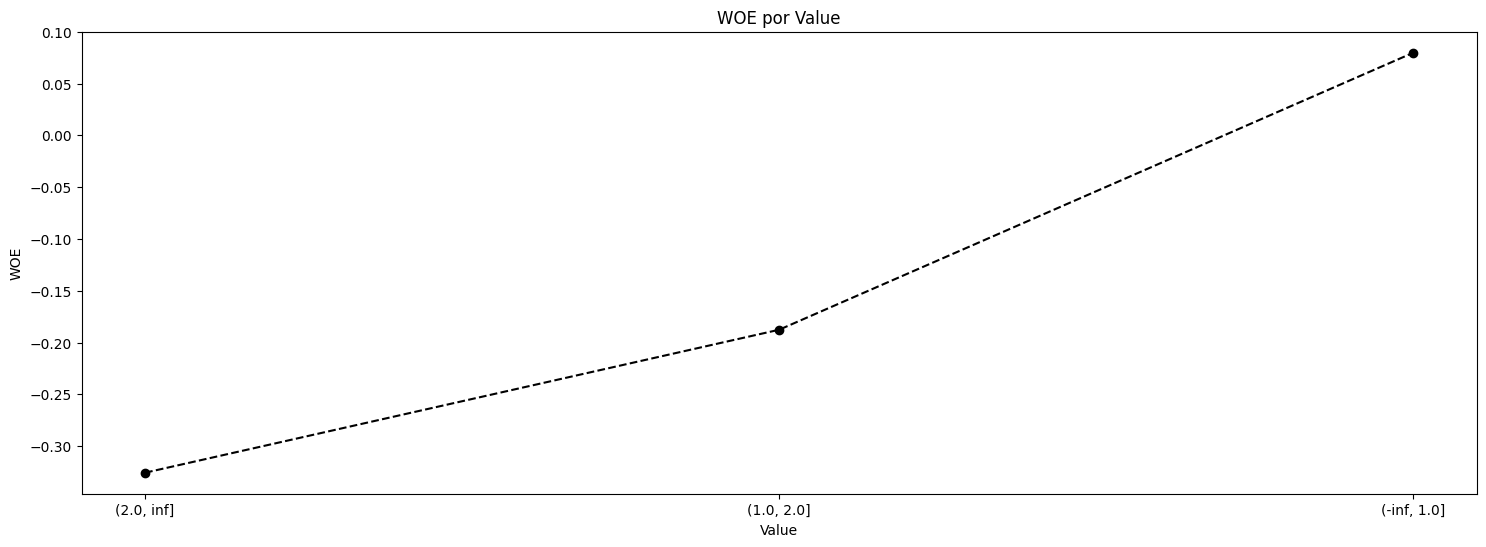

In [ ]:
plot_by_woe(ReporteWoe_v6)

### **Se observa que todas las graficas son Monótonas Crecientes es decir las variables escogidas son buenos predictores de la variable objetivo**



In [ ]:
sel_vars_num=['Nro_prestao_retrasados', 'Edad', 'Mto_ingreso_mensual' ,'Prct_deuda_vs_ingresos' , 'Nro_prod_financieros_deuda', 'Nro_dependiente']


In [ ]:
from feature_engine.encoding import WoEEncoder

In [ ]:
encoder_1 = WoEEncoder(variables=sel_vars_num,
                       fill_value=0)
encoder_1.fit(X_train_t_p5_numdisc[sel_vars_num], y_train)

WoEEncoder(fill_value=0,
           variables=['Nro_prestao_retrasados', 'Edad', 'Mto_ingreso_mensual',
                      'Prct_deuda_vs_ingresos', 'Nro_prod_financieros_deuda',
                      'Nro_dependiente'])

In [ ]:
X_train_t_p5_num_woe_enc = encoder_1.transform(X_train_t_p5_numdisc[sel_vars_num])
X_test_t_p5_num_woe_enc = encoder_1.transform(X_test_t_p5_numdisc[sel_vars_num])

In [ ]:
X_train_t_p5_num_woe_enc.head()

,Nro_prestao_retrasados,Edad,Mto_ingreso_mensual,Prct_deuda_vs_ingresos,Nro_prod_financieros_deuda,Nro_dependiente
70904,-0.252836,-0.544864,0.212753,-0.120307,-0.133759,-0.079754
63717,-0.252836,-0.933279,-0.200575,-0.109001,-0.133759,-0.079754
88897,-0.252836,0.384485,0.139121,-0.226953,-0.214768,-0.079754
56330,-0.252836,-0.544864,-0.200575,-0.109001,0.498621,-0.079754
84825,-0.252836,0.132900,0.139121,0.001831,-0.112815,0.325626


## **Análisis de Correlaciones**
### Revisaremos si existe correlación en las variables predictoras que hemos elegido, con el fin de depurarlas

In [ ]:
# Creemos una función para identificar  a las variables correlacionadas
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr(method='pearson')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                colname = corr_matrix.columns[j]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train_t_p5[sel_vars_num], 0.5)
len(set(corr_features))

0

<Axes: >

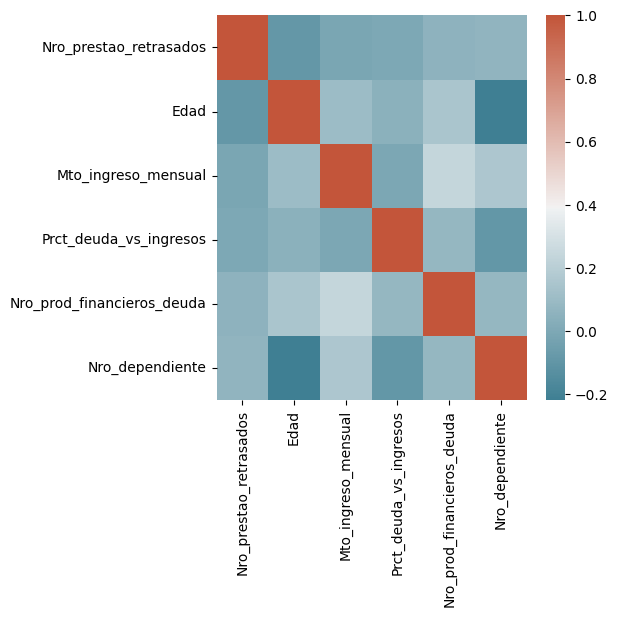

In [ ]:
corrmat2 = X_train_t_p5[sel_vars_num].corr(method='pearson')
cmap = sns.diverging_palette(220, 20, as_cmap=True)
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
sns.heatmap(corrmat2, cmap=cmap)

### Nos quedaremos con las mismas variables ya que en el analisis no se encontraron variables correlacionadas

In [ ]:
sel_vars_2=['Nro_prestao_retrasados', 'Edad', 'Mto_ingreso_mensual' ,'Prct_deuda_vs_ingresos' , 'Nro_prod_financieros_deuda', 'Nro_dependiente']

sel_vars_num_2 = sel_vars_2

### Actualicemos nuestro pipeline de Feature Engineering antes de iniciar el entrenamiento del modelo

In [ ]:
pipe_3 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['Nro_dependiente'])
        ),
         (   "dt_imputer",
            ColumnTransformer(transformers=[('e', IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),random_state=0), ['Mto_ingreso_mensual'])],
                              remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")

        ),
        (
            "capper_1",
         Winsorizer(variables=['Mto_ingreso_mensual' , 'Prct_uso_tc' , 'Prct_deuda_vs_ingresos' , 'Nro_retraso_60dias' , 'Nro_creditos_hipotecarios' , 'Nro_retraso_ultm3anios' , 'Nro_dependiente', 'Nro_prestao_retrasados'],capping_method="quantiles",tail="right",fold=0.01)
        ),
        (
            "capper_2",
         Winsorizer(variables=['Edad'], capping_method="quantiles", tail="both", fold=0.01)
        ),
        (   "scaler",
            ColumnTransformer(transformers=[('e', RobustScaler(), ['Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente'])],
                              remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")
        ),

          ("discretiser", EqualFrequencyDiscretiser(q=10, variables=['Nro_prestao_retrasados', 'Edad', 'Mto_ingreso_mensual' ,'Prct_deuda_vs_ingresos' , 'Nro_prod_financieros_deuda', 'Nro_dependiente']  , return_boundaries=True)),

             (
            "encoder_1",
            WoEEncoder(variables=['Nro_prestao_retrasados', 'Edad', 'Mto_ingreso_mensual' ,'Prct_deuda_vs_ingresos' , 'Nro_prod_financieros_deuda', 'Nro_dependiente'], fill_value=0)
        ),

    ]
)

In [ ]:
pipe_3.fit(X_train,y_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['Nro_dependiente'])),
                ('dt_imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('e',
                                                  IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),
                                                                   random_state=0),
                                                  ['Mto_ingreso_mensual'])],
                                   verbose_feature_names_out=False)),
                ('capper_1',
                 Winsorizer(capping_method='quantiles',...
                 EqualFrequencyDiscretiser(return_boundaries=True,
                                           variables=['Nro_prestao_retrasados',
                                                      'Edad',
                                                      'Mto_ingreso_mensual',
                                                      'Prct_deuda_vs_ingresos',
                                                      'Nro_prod_financieros_deuda',
                                                      'Nro_dependiente'])),
                ('encoder_1',
                 WoEEncoder(fill_value=0,
                            variables=['Nro_prestao_retrasados', 'Edad',
                                       'Mto_ingreso_mensual',
                                       'Prct_deuda_vs_ingresos',
                                       'Nro_prod_financieros_deuda',
                                       'Nro_dependiente']))])

In [ ]:
X_train_t_p6 = pipe_3.transform(X_train)
X_test_t_p6 = pipe_3.transform(X_test)

## **Entrenamiento de los Modelos**

## **2.-Modelo Tradicional - Regresion Logistica**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


In [ ]:
logit = LogisticRegression()
logit.fit(X_train_t_p6[sel_vars_2], y_train)
pred_train_logit = logit.predict_proba(X_train_t_p6[sel_vars_2])
pred_test_logit = logit.predict_proba(X_test_t_p6[sel_vars_2])
print('Logit Train roc_auc: ', roc_auc_score(y_train, pred_train_logit[:,1]), 'Logit Train GINI: ', 2*roc_auc_score(y_train, pred_train_logit[:,1])-1)
print('Logit Test roc_auc: ', roc_auc_score(y_test, pred_test_logit[:,1]), 'Logit Test GINI: ', 2*roc_auc_score(y_test, pred_test_logit[:,1])-1)

Logit Train roc_auc:  0.7400891832459744 Logit Train GINI:  0.4801783664919488
Logit Test roc_auc:  0.7539160709246038 Logit Test GINI:  0.5078321418492076


In [ ]:
from sklearn.metrics import roc_curve


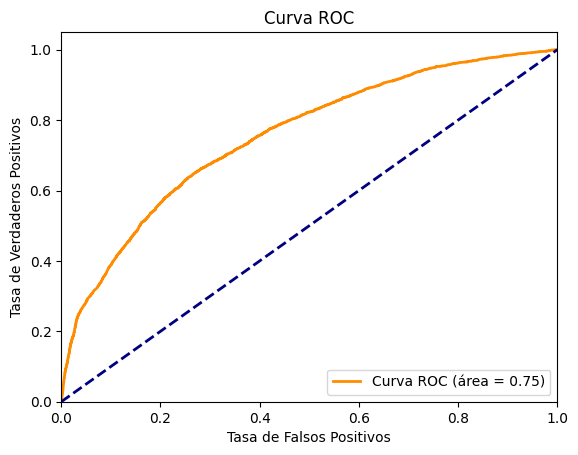

In [ ]:
y_pred_prob = logit.predict_proba(X_test_t_p6[sel_vars_2])[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

La grafica muestra que hay un 75% de probabilidad de que el modelo clasifique correctamente una instancia positiva más alto que una negativa. En otras palabras, el modelo tiene una buena habilidad para distinguir entre las clases positiva y negativa.

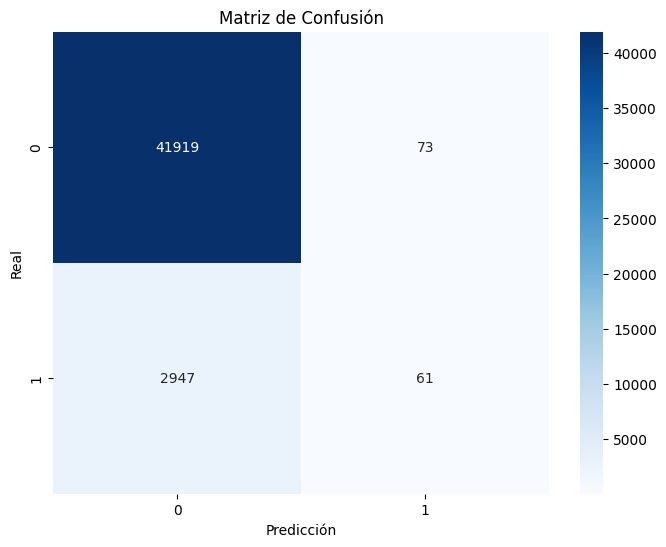

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Obtener las predicciones
y_pred = logit.predict(X_test_t_p6[sel_vars_2])

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

En este caso, la matriz muestra que el modelo es bueno para identificar correctamente los casos negativos (TN), pero tiene dificultades para identificar los casos positivos (TP), ya que hay un número significativo de FN (2,947) y FP (73).

## **3.-Modelos de Machine learning : Bagging / Boosting**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


### **Modelo Random Forest Classifier**

In [ ]:
rf = RandomForestClassifier(n_estimators=300, random_state=39)
rf.fit(X_train_t_p6[sel_vars_2], y_train)
pred_train_rf = rf.predict_proba(X_train_t_p6[sel_vars_2])
pred_test_rf = rf.predict_proba(X_test_t_p6[sel_vars_2])
print('RF Train roc_auc: ', roc_auc_score(y_train, pred_train_rf[:,1]), 'RF Train GINI: ', 2*roc_auc_score(y_train, pred_train_rf[:,1])-1)
print('RF Test roc_auc: ', roc_auc_score(y_test, pred_test_rf[:,1]), 'RF Test GINI: ', 2*roc_auc_score(y_test, pred_test_rf[:,1])-1)

RF Train roc_auc:  0.9057081777758788 RF Train GINI:  0.8114163555517575
RF Test roc_auc:  0.6705026237583754 RF Test GINI:  0.3410052475167509


#### **Se muestra que hay overfitting en el modelo de RandomForestClassifier**

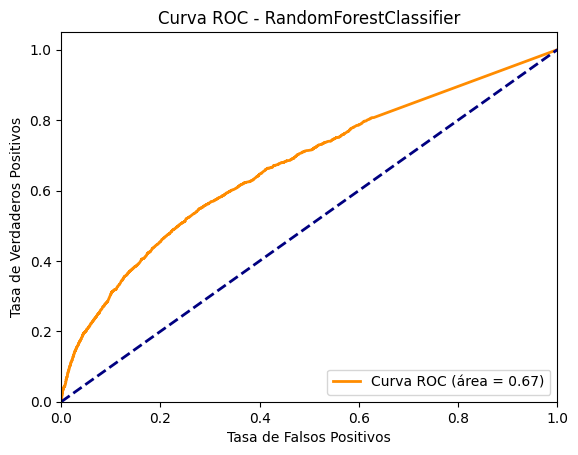

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob_rf = rf.predict_proba(X_test_t_p6[sel_vars_2])[:, 1]

# Calcular la curva ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - RandomForestClassifier')
plt.legend(loc="lower right")
plt.show()


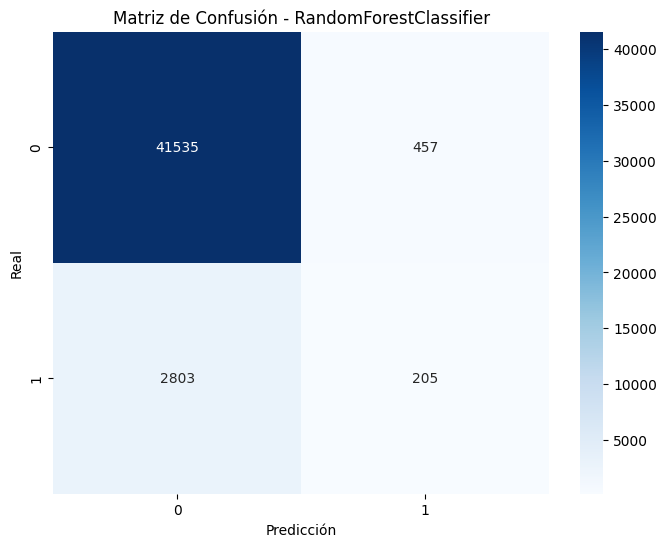

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcular la matriz de confusión
cm_rf = confusion_matrix(y_test, rf.predict(X_test_t_p6[sel_vars_2]))

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - RandomForestClassifier')
plt.show()


### **Modelo GradientBoostingClassifier**

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=300, random_state=44)
gbc.fit(X_train_t_p6[sel_vars_2], y_train)
pred_train_gbc = gbc.predict_proba(X_train_t_p6[sel_vars_2])
pred_test_gbc = gbc.predict_proba(X_test_t_p6[sel_vars_2])
print('GBC Train roc_auc: ', roc_auc_score(y_train, pred_train_gbc[:,1]), 'GBC Train GINI: ', 2*roc_auc_score(y_train, pred_train_gbc[:,1])-1)
print('GBC Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]), 'GBC Test GINI: ', 2*roc_auc_score(y_test, pred_test_gbc[:,1])-1)

GBC Train roc_auc:  0.7573031193247183 GBC Train GINI:  0.5146062386494366
GBC Test roc_auc:  0.7619280295094202 GBC Test GINI:  0.5238560590188404


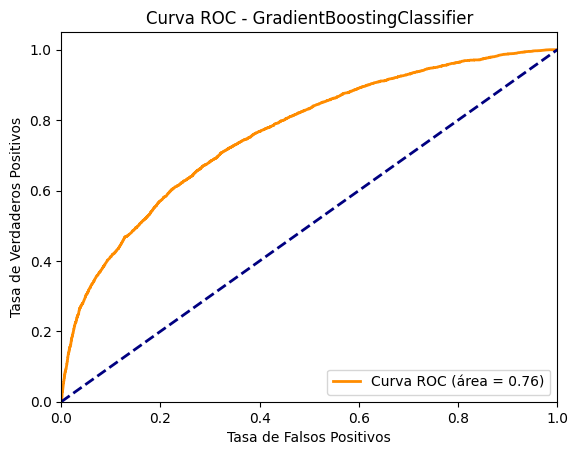

In [ ]:
y_pred_prob_gbc = gbc.predict_proba(X_test_t_p6[sel_vars_2])[:, 1]

# Calcular la curva ROC
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test, y_pred_prob_gbc)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr_gbc, tpr_gbc, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc_gbc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - GradientBoostingClassifier')
plt.legend(loc="lower right")
plt.show()


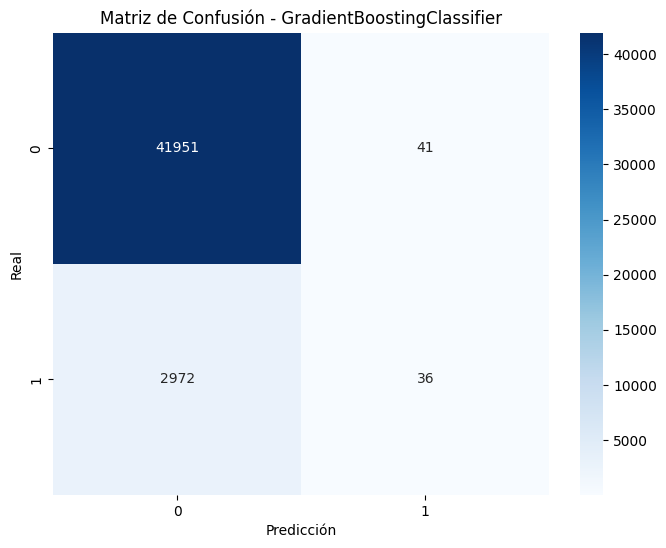

In [ ]:
# Calcular la matriz de confusión
cm_gbc = confusion_matrix(y_test, gbc.predict(X_test_t_p6[sel_vars_2]))

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gbc, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - GradientBoostingClassifier')
plt.show()


## **Optimización de Hiperparámetros**

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.model_selection import RandomizedSearchCV

### **Random Forest**

#### Usando RandomSearch

In [ ]:
# Seteamos el modelo
rf = RandomForestClassifier(random_state=39)

# Definimos el espacio de hiperparámetros
rf_param_grid = dict(
    n_estimators=stats.randint(10, 200),
    min_samples_split=stats.uniform(0, 1),
    max_depth=stats.randint(1, 5),
    )

# Búsqueda
reg_rf = RandomizedSearchCV(rf, rf_param_grid, scoring='roc_auc', cv=5, return_train_score=True, n_iter = 60, random_state=10, n_jobs=4)
search_rf = reg_rf.fit(X_train_t_p6[sel_vars_2], y_train)

# Obtiene los mejores hiperparámetros
search_rf.best_params_

{'max_depth': 4, 'min_samples_split': 0.07685550174624711, 'n_estimators': 155}

In [ ]:
results = pd.DataFrame(search_rf.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,"{'max_depth': 4, 'min_samples_split': 0.076855...",0.742081,0.001228,0.740079,0.005243
1,"{'max_depth': 3, 'min_samples_split': 0.048628...",0.738357,0.001318,0.736872,0.005590
2,"{'max_depth': 3, 'min_samples_split': 0.000272...",0.737855,0.001269,0.736456,0.005392
3,"{'max_depth': 3, 'min_samples_split': 0.030616...",0.737695,0.001168,0.736265,0.005422
4,"{'max_depth': 3, 'min_samples_split': 0.038460...",0.737447,0.001238,0.736048,0.005449
5,"{'max_depth': 3, 'min_samples_split': 0.140575...",0.736238,0.000933,0.734644,0.006340
6,"{'max_depth': 2, 'min_samples_split': 0.131458...",0.734526,0.001490,0.733333,0.005769
7,"{'max_depth': 2, 'min_samples_split': 0.159193...",0.733692,0.001260,0.732726,0.005326
8,"{'max_depth': 4, 'min_samples_split': 0.327144...",0.733439,0.001404,0.732158,0.005848
9,"{'max_depth': 4, 'min_samples_split': 0.335499...",0.733206,0.001406,0.731917,0.005643


Text(0.5, 0, 'Hyperparameter space')

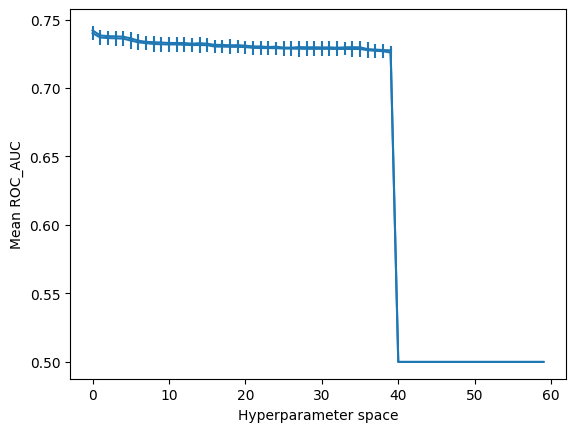

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

In [ ]:
rf = RandomForestClassifier(max_depth=4, min_samples_split=0.07685550174624711, n_estimators= 155, random_state=39)
rf.fit(X_train_t_p6[sel_vars_2], y_train)
pred_train_rf = rf.predict_proba(X_train_t_p6[sel_vars_2])
pred_test_rf = rf.predict_proba(X_test_t_p6[sel_vars_2])
print('RF Train roc_auc: ', roc_auc_score(y_train, pred_train_rf[:,1]), 'RF Train GINI: ', 2*roc_auc_score(y_train, pred_train_rf[:,1])-1)
print('RF Test roc_auc: ', roc_auc_score(y_test, pred_test_rf[:,1]), 'RF Test GINI: ', 2*roc_auc_score(y_test, pred_test_rf[:,1])-1)

RF Train roc_auc:  0.7418333706892466 RF Train GINI:  0.4836667413784932
RF Test roc_auc:  0.7548047517852945 RF Test GINI:  0.509609503570589


#### **Usando GridSearch**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Seteamos el modelo
rfg = RandomForestClassifier(random_state=39)

# Definimos el espacio de hiperparámetros
rfg_param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'min_samples_split': [2, 5, 10, 20],
    'max_depth': [None, 10, 20, 30, 40, 50]
}

# Búsqueda con GridSearchCV
ggrid_rf = GridSearchCV(rfg, rfg_param_grid, scoring='roc_auc', cv=5, return_train_score=True, n_jobs=4)
gsearch_rf = ggrid_rf.fit(X_train_t_p6[sel_vars_2], y_train)

# Obtener los mejores hiperparámetros
search_rf.best_params_

{'max_depth': 4, 'min_samples_split': 0.07685550174624711, 'n_estimators': 155}

In [ ]:
gsearch_rf.best_params_

{'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 200}

In [ ]:
results = pd.DataFrame(gsearch_rf.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,"{'max_depth': 10, 'min_samples_split': 20, 'n_...",0.787060,0.001296,0.745680,0.004396
1,"{'max_depth': 10, 'min_samples_split': 10, 'n_...",0.789238,0.001065,0.745454,0.003901
2,"{'max_depth': 10, 'min_samples_split': 10, 'n_...",0.789149,0.001139,0.745380,0.004271
3,"{'max_depth': 10, 'min_samples_split': 20, 'n_...",0.786959,0.001303,0.745201,0.004086
4,"{'max_depth': 10, 'min_samples_split': 5, 'n_e...",0.790577,0.000969,0.745080,0.004386
...,...,...,...,...,...
91,"{'max_depth': 20, 'min_samples_split': 2, 'n_e...",0.910299,0.000918,0.642997,0.007067
92,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.911039,0.000774,0.638931,0.006267
93,"{'max_depth': 50, 'min_samples_split': 2, 'n_e...",0.911039,0.000774,0.638931,0.006267
94,"{'max_depth': 40, 'min_samples_split': 2, 'n_e...",0.911039,0.000774,0.638931,0.006267


In [ ]:
rf = RandomForestClassifier(max_depth=4, min_samples_split=20, n_estimators= 200, random_state=39)
rf.fit(X_train_t_p6[sel_vars_2], y_train)
pred_train_rf = rf.predict_proba(X_train_t_p6[sel_vars_2])
pred_test_rf = rf.predict_proba(X_test_t_p6[sel_vars_2])
print('RF Train roc_auc: ', roc_auc_score(y_train, pred_train_rf[:,1]), 'RF Train GINI: ', 2*roc_auc_score(y_train, pred_train_rf[:,1])-1)
print('RF Test roc_auc: ', roc_auc_score(y_test, pred_test_rf[:,1]), 'RF Test GINI: ', 2*roc_auc_score(y_test, pred_test_rf[:,1])-1)

RF Train roc_auc:  0.7433208684452595 RF Train GINI:  0.48664173689051893
RF Test roc_auc:  0.7558341279797975 RF Test GINI:  0.5116682559595951


#### **Usando Bayesian Search**

In [ ]:
!pip install optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.3 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    rf_n_estimators = trial.suggest_int('n_estimators', 10, 200)
    rf_max_depth = trial.suggest_int('max_depth', 1, 50)
    rf_min_samples_split = trial.suggest_int('min_samples_split', 2, 20)

    model = RandomForestClassifier(
        n_estimators=rf_n_estimators,
        max_depth=rf_max_depth,
        min_samples_split=rf_min_samples_split,
        random_state=39
    )

    score = cross_val_score(model, X_train_t_p6[sel_vars_2], y_train, cv=5, scoring='roc_auc')
    roc_auc = score.mean()
    return roc_auc

rf_study = optuna.create_study(direction='maximize')
rf_study.optimize(objective, n_trials=45)

# Mejor conjunto de hiperparámetros
rf_study.best_params


[I 2024-07-19 02:20:35,822] A new study created in memory with name: no-name-1d377fa1-1c6f-499b-8ce7-1c32e3511f6d
[I 2024-07-19 02:21:14,787] Trial 0 finished with value: 0.7132967931614687 and parameters: {'n_estimators': 145, 'max_depth': 14, 'min_samples_split': 3}. Best is trial 0 with value: 0.7132967931614687.
[I 2024-07-19 02:22:02,260] Trial 1 finished with value: 0.7056918466956819 and parameters: {'n_estimators': 109, 'max_depth': 20, 'min_samples_split': 15}. Best is trial 0 with value: 0.7132967931614687.
[I 2024-07-19 02:22:39,103] Trial 2 finished with value: 0.7026148371388242 and parameters: {'n_estimators': 95, 'max_depth': 44, 'min_samples_split': 14}. Best is trial 0 with value: 0.7132967931614687.
[I 2024-07-19 02:23:05,003] Trial 3 finished with value: 0.7464723405251732 and parameters: {'n_estimators': 94, 'max_depth': 9, 'min_samples_split': 10}. Best is trial 3 with value: 0.7464723405251732.
[I 2024-07-19 02:23:42,521] Trial 4 finished with value: 0.66013728137

{'n_estimators': 114, 'max_depth': 8, 'min_samples_split': 7}

In [ ]:
rf = RandomForestClassifier(max_depth=8, min_samples_split=14, n_estimators= 86, random_state=39)
rf.fit(X_train_t_p6[sel_vars_2], y_train)
pred_train_rf = rf.predict_proba(X_train_t_p6[sel_vars_2])
pred_test_rf = rf.predict_proba(X_test_t_p6[sel_vars_2])
print('RF Train roc_auc: ', roc_auc_score(y_train, pred_train_rf[:,1]), 'RF Train GINI: ', 2*roc_auc_score(y_train, pred_train_rf[:,1])-1)
print('RF Test roc_auc: ', roc_auc_score(y_test, pred_test_rf[:,1]), 'RF Test GINI: ', 2*roc_auc_score(y_test, pred_test_rf[:,1])-1)

RF Train roc_auc:  0.7616428277266181 RF Train GINI:  0.5232856554532361
RF Test roc_auc:  0.7606499832288216 RF Test GINI:  0.5212999664576432


### **Gradient Boosting**

#### Usando RandomSearch

In [ ]:
# Seteamos el modelo
gbc = GradientBoostingClassifier(random_state=0)

# Determina el espacio de hiperparámetros
gbc_param_grid = dict(
    n_estimators=stats.randint(10, 200),
    min_samples_split=stats.uniform(0, 1),
    max_depth=stats.randint(1, 5),
    )

# Búsqueda
reg_gbc = RandomizedSearchCV(gbc, gbc_param_grid, scoring='roc_auc', cv=5, return_train_score=True, n_iter = 35, random_state=10, n_jobs=4)
search_gbc = reg_gbc.fit(X_train_t_p6[sel_vars_2], y_train)

# Obtiene mejores hiperparámetros
search_gbc.best_params_

{'max_depth': 4, 'min_samples_split': 0.07685550174624711, 'n_estimators': 155}

In [ ]:
results = pd.DataFrame(search_gbc.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,"{'max_depth': 4, 'min_samples_split': 0.076855...",0.756555,0.001173,0.747311,0.004850
1,"{'max_depth': 3, 'min_samples_split': 0.030616...",0.751871,0.001292,0.745737,0.004265
2,"{'max_depth': 4, 'min_samples_split': 0.335499...",0.748835,0.001179,0.744517,0.004408
3,"{'max_depth': 4, 'min_samples_split': 0.467403...",0.748026,0.001306,0.744341,0.004614
4,"{'max_depth': 3, 'min_samples_split': 0.441833...",0.747272,0.001240,0.744127,0.004228
5,"{'max_depth': 2, 'min_samples_split': 0.131458...",0.747042,0.001062,0.743969,0.004300
6,"{'max_depth': 4, 'min_samples_split': 0.429492...",0.746131,0.001289,0.743303,0.004368
7,"{'max_depth': 3, 'min_samples_split': 0.373340...",0.746139,0.001279,0.743288,0.004244
8,"{'max_depth': 3, 'min_samples_split': 0.356250...",0.745968,0.001256,0.743278,0.004294
9,"{'max_depth': 4, 'min_samples_split': 0.309778...",0.746665,0.001101,0.743228,0.004426


Text(0.5, 0, 'Hyperparameter space')

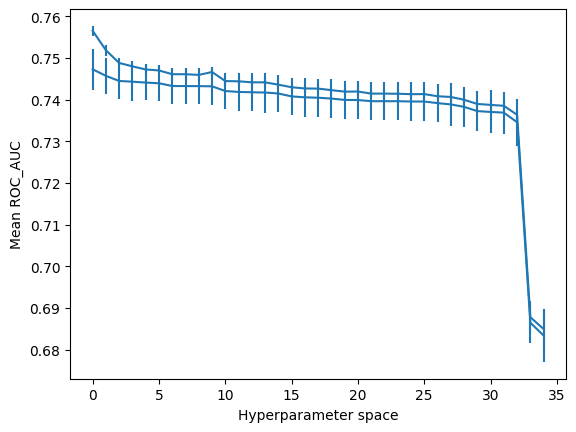

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

In [ ]:
gbc = GradientBoostingClassifier(max_depth=4, min_samples_split=0.07685550174624711, n_estimators=155, random_state=44)
gbc.fit(X_train_t_p6[sel_vars_2], y_train)
pred_train_gbc = gbc.predict_proba(X_train_t_p6[sel_vars_2])
pred_test_gbc = gbc.predict_proba(X_test_t_p6[sel_vars_2])
print('GBC Train roc_auc: ', roc_auc_score(y_train, pred_train_gbc[:,1]), 'GBC Train GINI: ', 2*roc_auc_score(y_train, pred_train_gbc[:,1])-1)
print('GBC Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]), 'GBC Test GINI: ', 2*roc_auc_score(y_test, pred_test_gbc[:,1])-1)

GBC Train roc_auc:  0.7554980829758956 GBC Train GINI:  0.5109961659517912
GBC Test roc_auc:  0.7617539327399748 GBC Test GINI:  0.5235078654799497


#### Usando BayesianSearch

In [ ]:

def objective(trial):
    gbc_n_estimators = trial.suggest_int('n_estimators', 100, 200)
    gbc_max_depth = trial.suggest_int('max_depth', 1, 5)
    gbc_min_samples_split = trial.suggest_float('min_samples_split', 0.01, 1.0)

    model = GradientBoostingClassifier(
        n_estimators=gbc_n_estimators,
        max_depth=gbc_max_depth,
        min_samples_split=gbc_min_samples_split,
        random_state=39
    )

    score = cross_val_score(model, X_train_t_p6[sel_vars_2], y_train, cv=5, scoring='roc_auc')
    roc_auc = score.mean()
    return roc_auc

bayesian_gra = optuna.create_study(direction='maximize')
bayesian_gra.optimize(objective, n_trials=25)

[I 2024-07-19 03:06:36,749] A new study created in memory with name: no-name-a80dede6-89b1-4ef3-9645-d920c1f2467f
[I 2024-07-19 03:06:54,248] Trial 0 finished with value: 0.7395117817309926 and parameters: {'n_estimators': 117, 'max_depth': 2, 'min_samples_split': 0.9300762814974821}. Best is trial 0 with value: 0.7395117817309926.
[I 2024-07-19 03:07:40,060] Trial 1 finished with value: 0.7433185177066267 and parameters: {'n_estimators': 182, 'max_depth': 4, 'min_samples_split': 0.6541718301070659}. Best is trial 1 with value: 0.7433185177066267.
[I 2024-07-19 03:08:30,063] Trial 2 finished with value: 0.7466301020880943 and parameters: {'n_estimators': 163, 'max_depth': 3, 'min_samples_split': 0.03200151543817475}. Best is trial 2 with value: 0.7466301020880943.
[I 2024-07-19 03:09:19,095] Trial 3 finished with value: 0.7441129740502269 and parameters: {'n_estimators': 190, 'max_depth': 5, 'min_samples_split': 0.5700364729424419}. Best is trial 2 with value: 0.7466301020880943.
[I 20

In [ ]:
# Muestra los mejores hiperparámetros
best_params = bayesian_gra.best_params
print("Best parameters:", best_params)

Best parameters: {'n_estimators': 172, 'max_depth': 3, 'min_samples_split': 0.011552954668472133}


In [ ]:
# Entrena el modelo con los mejores hiperparametros
gbc_best = GradientBoostingClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=44
)

gbc_best.fit(X_train_t_p6[sel_vars_2], y_train)

GradientBoostingClassifier(min_samples_split=0.011552954668472133,
                           n_estimators=172, random_state=44)

In [ ]:
pred_train_gbc = gbc_best.predict_proba(X_train_t_p6[sel_vars_2])[:, 1]
pred_test_gbc = gbc_best.predict_proba(X_test_t_p6[sel_vars_2])[:, 1]

#Muestra las metricas
print('GBC Train roc_auc: ', roc_auc_score(y_train, pred_train_gbc), ' GBC Train GINI: ', 2*roc_auc_score(y_train, pred_train_gbc)-1)
print('GBC Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc), ' GBC Test GINI: ', 2*roc_auc_score(y_test, pred_test_gbc)-1)

GBC Train roc_auc:  0.7541259752032552  GBC Train GINI:  0.5082519504065104
GBC Test roc_auc:  0.7616840779006031  GBC Test GINI:  0.5233681558012062


### **Comparamos entre los 3 modelos las metricas basadas en sus rendimientos en test**

In [ ]:
print('Logit Test roc_auc: ', roc_auc_score(y_test, pred_test_logit[:,1]), 'Logit Test GINI: ', 2*roc_auc_score(y_test, pred_test_logit[:,1])-1)
print('RF Test roc_auc: ', roc_auc_score(y_test, pred_test_rf[:,1]), 'RF Test GINI: ', 2*roc_auc_score(y_test, pred_test_rf[:,1])-1)
print('GBC Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc), ' GBC Test GINI: ', 2*roc_auc_score(y_test, pred_test_gbc)-1)

Logit Test roc_auc:  0.7539160709246038 Logit Test GINI:  0.5078321418492076
RF Test roc_auc:  0.7606499832288216 RF Test GINI:  0.5212999664576432
GBC Test roc_auc:  0.7616840779006031  GBC Test GINI:  0.5233681558012062


### **Se observa de los resultados que el mejor modelo es el de Gradient Boosting , ya que obtuvo mejores resultados en sus metricas de Roc_auc(76.1%) y Gini(52.3%)**

## **Evaluación del Modelo**

In [ ]:
# Importamos accuracy_score , para calcular la precisión del modelo, que es la proporción de predicciones correctas sobre el total de predicciones.
from sklearn.metrics import accuracy_score

In [ ]:
#Calculamos la proporción de cada clase en el conjunto de prueba

br_test=y_test.value_counts() / len(y_test)
br_test

Default
0    0.933156
1    0.066844
Name: count, dtype: float64

**Se observa que hay un problema de clasificación desbalanceada con una clase mayoritaria (0) y una clase minoritaria (1).**

In [ ]:
y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

In [ ]:

print('Accuracy Baseline test: ', accuracy_score(y_test, y_test_base))
print('Accuracy GBC test:', accuracy_score(y_test, gbc.predict(X_test_t_p6[sel_vars_2])))

Accuracy Baseline test:  0.9331555555555555
Accuracy GBC test: 0.9331333333333334


#### **El modelo Gradient Boosting tiene una precisión similar a la línea base, es decir podría estar sesgado hacia la clase mayoritaria.**

In [ ]:
# Ahora aplicaremos el balanced_accuracy_score
from sklearn.metrics import (
    balanced_accuracy_score,
    recall_score,
)

In [ ]:
print('Balanced accuracy, Baseline test: ', balanced_accuracy_score(y_test, y_test_base))
print('Balanced accuracy, GBC test:',  balanced_accuracy_score(y_test,gbc.predict(X_test_t_p6[sel_vars_2])))

Balanced accuracy, Baseline test:  0.5
Balanced accuracy, GBC test: 0.5013769403391933


**La precisión balanceada del modelo Gradient Boosting es por poco mejor que la de la línea base, esto indica que tiene una capacidad limitada para predecir correctamente la clase minoritaria.**

## **Precision, Recall, F-measure, Support**


In [ ]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    precision_recall_fscore_support,
)

In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(
    y_test, gbc.predict(X_test_t_p6[sel_vars_2]))

print('Precision: ', precision[1:])
print('Recall: ', recall[1:])
print('F1-score: ', fscore[1:])

Precision:  [0.47368421]
Recall:  [0.00299202]
F1-score:  [0.00594648]


### **Matriz de Confusión**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, gbc.predict(X_test_t_p6[sel_vars_2]), labels=[0,1])

array([[41982,    10],
       [ 2999,     9]])

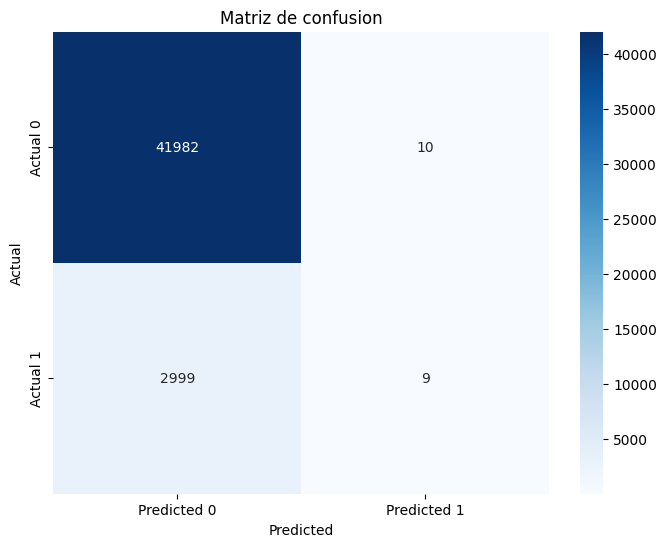

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, gbc.predict(X_test_t_p6[sel_vars_2]), labels=[0,1])

# Mapa de Calor
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de confusion')
plt.show()

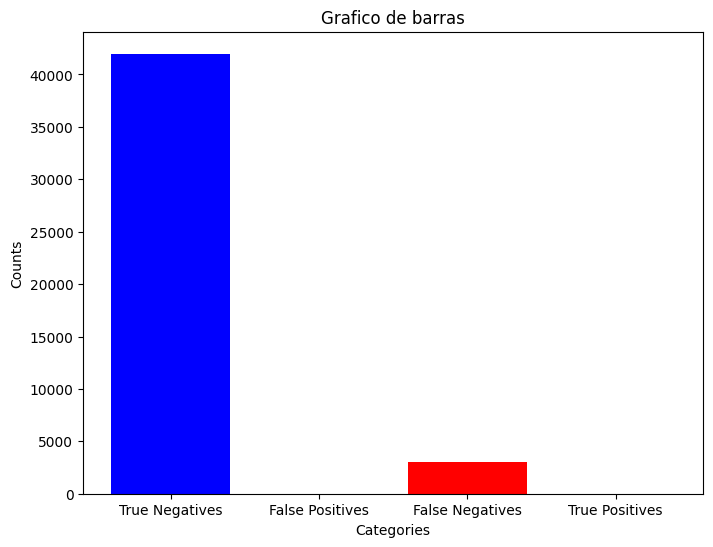

In [ ]:
import numpy as np

# Valores de la matriz de confusión
cm_values = cm.ravel()

# Gráfico de Barras Apiladas
plt.figure(figsize=(8,6))
labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
colors = ['blue', 'orange', 'red', 'green']
plt.bar(labels, cm_values, color=colors)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Grafico de barras')
plt.show()

### **Identificaremos un punto de corte óptimo que maximice el F1 Score**

In [ ]:
from yellowbrick.classifier import (
    DiscriminationThreshold,
)

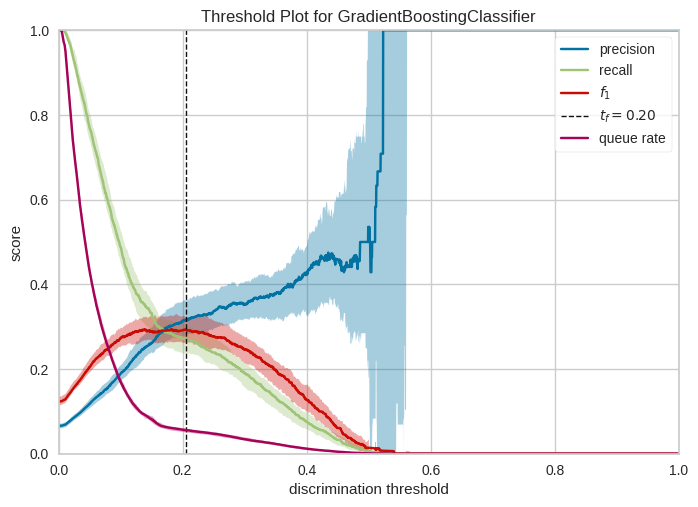

<Axes: title={'center': 'Threshold Plot for GradientBoostingClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [ ]:
visualizer = DiscriminationThreshold(gbc, is_fitted=True, random_state=0, argmax='fscore')
visualizer.fit(X_test_t_p6[sel_vars_2], y_test)
visualizer.score(X_test_t_p6[sel_vars_2], y_test)
visualizer.show()

### **La gráfica de umbral de discriminación nos muestra cómo diferentes métricas de rendimiento (precisión, recall, F1-score y tasa de cola) varían con los diferentes umbrales de decisión para el modelo de GradientBoostingClassifier.**

### **Se observa que la F1-score es máxima alrededor del umbral de 0.20, indicado por la línea vertical punteada. Este umbral es el punto donde el modelo logra el mejor equilibrio entre capturar la mayoría de los positivos reales y mantener un alto valor predictivo positivo.**

### **Calculamos el ROC**

In [ ]:
from yellowbrick.classifier import ROCAUC

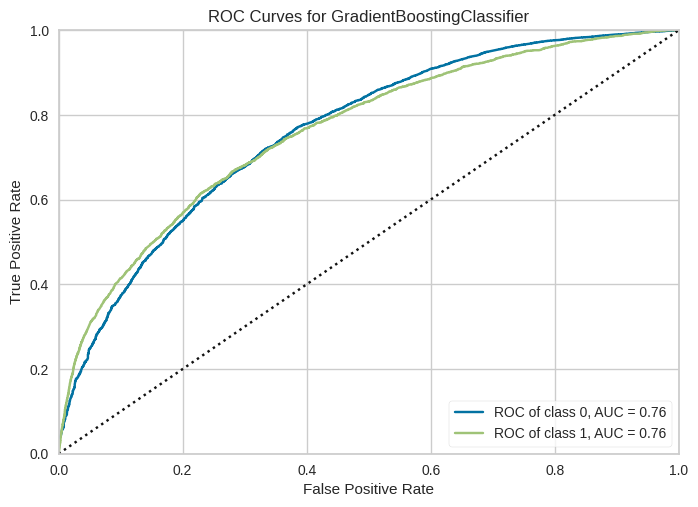

<Axes: title={'center': 'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer2 = ROCAUC(gbc, is_fitted=True, micro=False, macro=False,)
visualizer2.fit(X_test_t_p6[sel_vars_2], y_test)
visualizer2.score(X_test_t_p6[sel_vars_2], y_test)
visualizer2.show()

###  **La curva ROC AUC proporciona una visión de la capacidad del modelo para distinguir entre las clases positivas y negativas. Con un AUC de 0.76, el GradientBoostingClassifier muestra un rendimiento razonablemente bueno**

## **Aplicando técnicas de balanceo**

In [ ]:
X_y_train = pd.concat([X_train_t_p6[sel_vars_2].reset_index(drop = True),
                       y_train.reset_index(drop = True)], axis = 1)
count_nondefault, count_default = X_y_train['Default'].value_counts()
print(count_nondefault,count_default)

97982 7018


In [ ]:
X_y_train.shape

(105000, 7)

In [ ]:
# Separamos la muestra en 2 partes: defaults y no defaults
nondefaults = X_y_train[X_y_train['Default'] == 0]
defaults = X_y_train[X_y_train['Default'] == 1]
print(nondefaults.shape)
print(defaults.shape)

(97982, 7)
(7018, 7)


In [ ]:
# Reducimos la muestra de nondefaults
nondefaults_under = nondefaults.sample(count_default)
print(nondefaults_under.shape)

(7018, 7)


In [ ]:
# Unimos la muestra de defaults y la de nondefaults reducida
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)

# Verificamos los nros de defaults y no defaults
print(X_y_train_under['Default'].value_counts())

Default
0    7018
1    7018
Name: count, dtype: int64


In [ ]:
X_y_train_under.shape

(14036, 7)

In [ ]:
X_train_rus=X_y_train_under.drop(columns='Default')
X_train_rus.head()

,Nro_prestao_retrasados,Edad,Mto_ingreso_mensual,Prct_deuda_vs_ingresos,Nro_prod_financieros_deuda,Nro_dependiente
0,-0.252836,0.589770,0.256655,0.244628,-0.276430,0.325626
1,-0.252836,0.027587,0.021958,0.001831,-0.214768,-0.079754
2,-0.252836,-0.303869,0.430938,0.001831,-0.276430,-0.079754
3,-0.252836,0.176171,-0.227081,-0.168824,-0.276430,0.325626
4,-0.252836,0.176171,-0.416239,-0.206630,-0.039433,0.325626


In [ ]:
y_train_rus=X_y_train_under['Default']
y_train_rus.value_counts()

Default
0    7018
1    7018
Name: count, dtype: int64

In [ ]:
# set up the model
gbc2 = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
gbc_param_grid = dict(
    n_estimators=stats.randint(10, 200),
    min_samples_split=stats.uniform(0, 1),
    max_depth=stats.randint(1, 5),
    )

# search
reg_gbc2 = RandomizedSearchCV(gbc2, gbc_param_grid, scoring='roc_auc', cv=5, return_train_score=True, n_iter = 30, random_state=10, n_jobs=4)
search_gbc2 = reg_gbc2.fit(X_train_rus, y_train_rus)

# best hyperparameters
search_gbc2.best_params_

{'max_depth': 4, 'min_samples_split': 0.07685550174624711, 'n_estimators': 155}

In [ ]:
# Modelo GBC con balanceo y sin balanceo
pred_test_gbc = search_gbc.predict_proba(X_test_t_p6[sel_vars_2])
pred_test_gbc2 = search_gbc2.predict_proba(X_test_t_p6[sel_vars_2])
print('Sin Balanceo Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]), 'GINI Test ', 2*roc_auc_score(y_test, pred_test_gbc[:,1])-1)
print('Con Balanceo Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc2[:,1]), 'GINI Test ', 2*roc_auc_score(y_test, pred_test_gbc2[:,1])-1)

Sin Balanceo Test roc_auc:  0.7617539327399748 GINI Test  0.5235078654799497
Con Balanceo Test roc_auc:  0.7601295454770007 GINI Test  0.5202590909540015


El Gradient Boosting Classifier es un modelo robusto y puede manejar el desbalance de clases mejor que otros modelos más simples. Puede ser que el GBC ya esté funcionando tan bien con el desbalance original que el balanceo adicional no aporte una mejora significativa.

Los resultados indican que el balanceo de clases no tuvo un impacto significativo en el rendimiento del modelo, según las métricas ROC AUC y GINI. Esto sugiere que el modelo ya estaba manejando bien el desbalance de clases sin necesidad de balanceo adicional.

## **Calibración del Modelo:**
En esta parte verificaremos, y de ser necesario, calibraremos el modelo revisando la relación entre los valores los ratios de default reales y las PDs promedios que arroja el modelo.

In [ ]:
from sklearn.calibration import calibration_curve

In [ ]:
# Veamos los RDs y los promedios de PDs en cada bucket para el modelo original (sin balanceo)
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_test, pred_test_gbc[:, 1], n_bins=10, strategy='uniform')

len(mean_predicted_value), len(fraction_of_positives)

(6, 6)

In [ ]:
def plot_calibration_curve(y_true, probs, bins, strategy):

    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_true, probs, n_bins=bins, strategy=strategy)

    max_val = max(mean_predicted_value)

    plt.figure(figsize=(8,10))
    plt.subplot(2, 1, 1)
    plt.plot(mean_predicted_value, fraction_of_positives, label='Modelo')
    plt.plot(np.linspace(0, max_val, bins), np.linspace(0, max_val, bins),
         linestyle='--', color='red', label='Perfect calibration')

    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of positive examples')
    plt.title('Calibration Curve')
    plt.legend(loc='upper left')


    plt.subplot(2, 1, 2)
    plt.hist(probs, range=(0, 1), bins=bins, density=True, stacked=True, alpha=0.3)
    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of examples')
    plt.title('Density')
    plt.show()

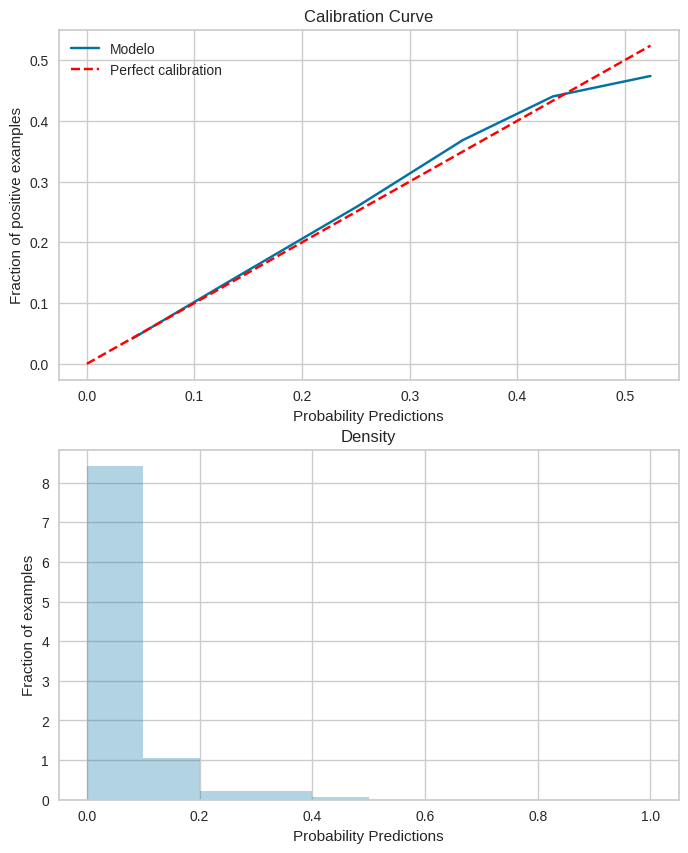

In [ ]:
plot_calibration_curve(y_test, pred_test_gbc[:, 1], bins=10, strategy='uniform')

#### En la grafica se observa una buena calibracion del modelo aunque con una pequeña desviasion en el extremo derecho

In [ ]:
from sklearn.metrics import brier_score_loss
brier_score_loss(y_test, pred_test_gbc[:, 1])

0.05671738071001507

Un Brier Score más bajo indica mejores predicciones probabilísticas. Un valor cercano a 0 es ideal.

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

### **Calibracion Sigmoide**

In [ ]:
cal_sigmoid = CalibratedClassifierCV(search_gbc, cv='prefit', method='sigmoid')
cal_sigmoid.fit(X_test_t_p6[sel_vars_2], y_test)
prob_sigmoid = cal_sigmoid.predict_proba(X_test_t_p6[sel_vars_2])[:, 1]

In [ ]:
brier_score_loss(y_test, prob_sigmoid)

0.05671039560570384

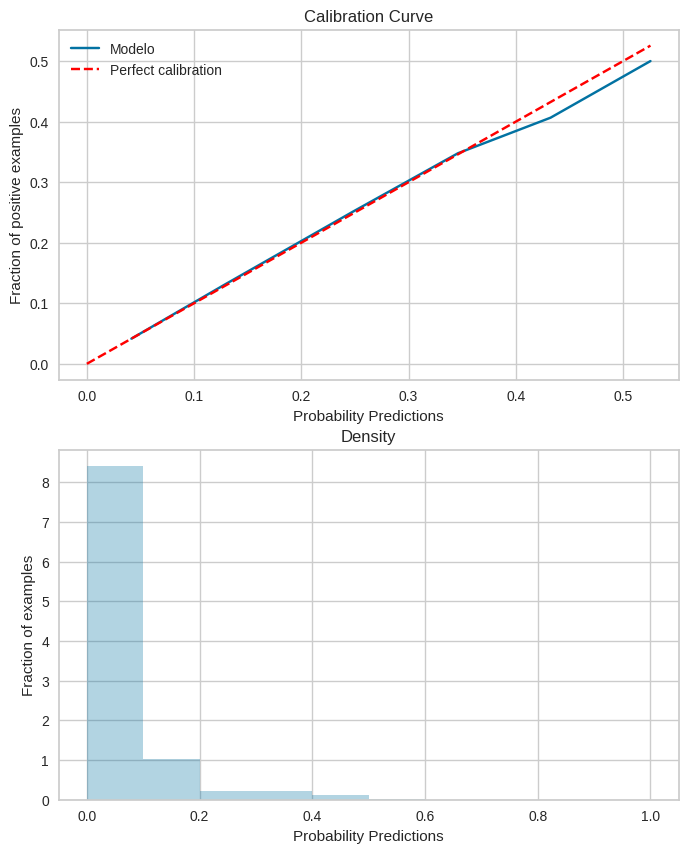

In [ ]:
plot_calibration_curve(y_test, prob_sigmoid, bins=10, strategy='uniform')

#### **Presenta una buena calibracion aunque esta un poco desviada entre 0.3 y 0.5**

### **Calibracion Isotónica**

In [ ]:
cal_isotonic = CalibratedClassifierCV(search_gbc, cv='prefit', method='isotonic')
cal_isotonic.fit(X_test_t_p6[sel_vars_2], y_test)
prob_isotonic = cal_isotonic.predict_proba(X_test_t_p6[sel_vars_2])[:, 1]

In [ ]:
brier_score_loss(y_test, prob_isotonic)

0.056563166949885293

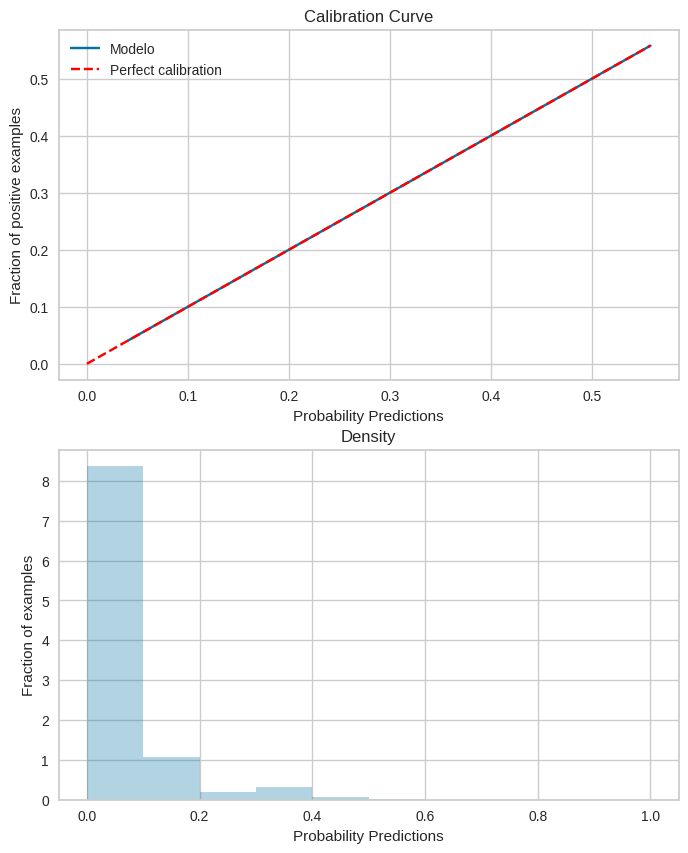

In [ ]:
plot_calibration_curve(y_test, prob_isotonic, bins=10, strategy='uniform')

En conclusio para este caso, ambos métodos de calibración ofrecen mejoras similares, ya que las pérdidas de Brier son casi idénticas, siendo ligeramente superior la calibracion isotonica

## **9. Unboxing de Modelos**

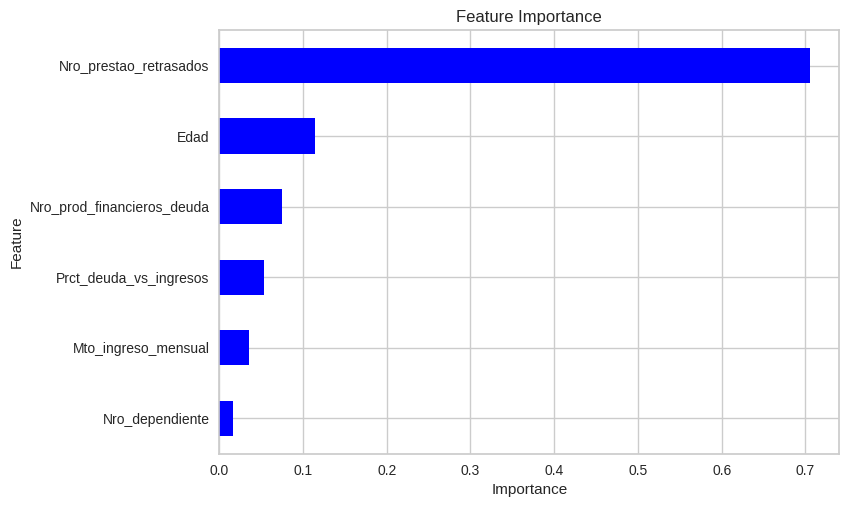

In [ ]:
fi=pd.Series(gbc.feature_importances_,index=gbc.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

En esta grafica se observa que la variable de mayor importacia es Nro_prestao_retrasados

### Ahora realicemos un análisis de la importancia de las variables usando **SHAP**

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 4.0 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(gbc)
shap_values_bin = explainer(X_test_t_p6[sel_vars_2])
print(shap_values_bin.shape)

(45000, 6)


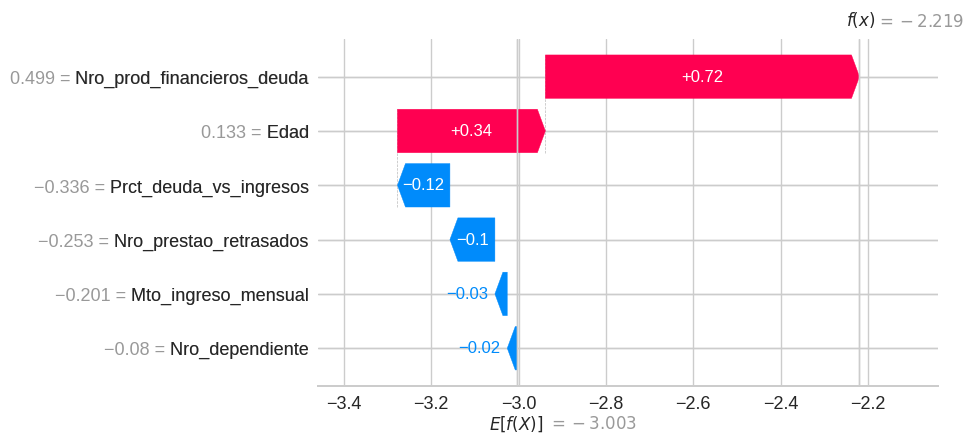

In [ ]:
shap.plots.waterfall(shap_values_bin[0],max_display=10)

**Se observa de la grafica que la variable Nro_prod_financieros_deuda incrementa la predicción en 0.72 luego le sigue la edad incrementando en 0.34 , mientras que la que mas disminuye la prediccion la variable Prct_deuda_v_ingresos en un 0.12**


In [ ]:
import math
# el valor del log odds en la primera observación es
x=-2.219
# Por tanto su probabilidad es:
1/(1+math.exp(-x))

0.09805721075002059

En la primera observación la probabilidad predicha de pertenecer a la clase positiva es 9.8%.

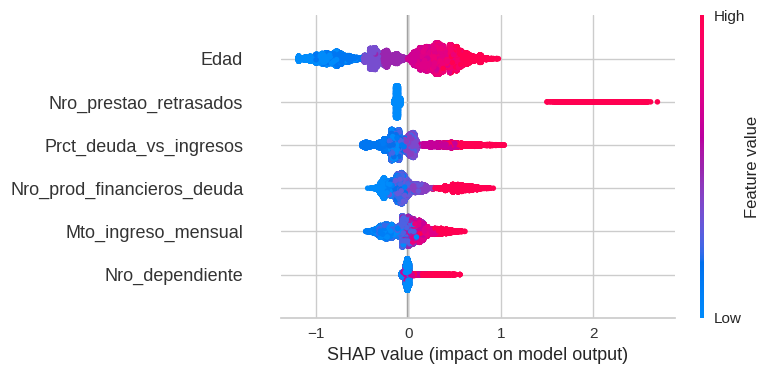

In [ ]:
# Crear un gráfico de resumen para todas las observaciones
shap.summary_plot(shap_values_bin, X_test_t_p6[sel_vars_2])

### **Se observa que la variable Edad tambien es una de las mas importantes y es la que tiene mayor valor medio de SHAP**

# **4.-Conclusiones y Artefactos para Productivizar el Modelo**

## **Pickling del Modelo y del Pipeline del Feature Engineering**

In [ ]:
import pickle

In [ ]:
# Empaquetamos el pipeline del feature engineering
with open('fe_pipeline.pickle','wb') as fe_data_file:
     pickle.dump(pipe_3,fe_data_file)

In [ ]:
# Empaquetamos el modelo obtenido
with open('final_model.pickle','wb') as modelFile:
     pickle.dump(gbc,modelFile)

In [ ]:
# Cargar el pipeline del feature engineering
with open('fe_pipeline.pickle','rb') as fe_data_file:
     fe_final = pickle.load(fe_data_file)

In [ ]:
# Cargar el modelo
with open('final_model.pickle','rb') as modelFile:
     modelo_final = pickle.load(modelFile)

# **CONCLUSIONES**



### **- Nuestro dataset inicialmente tenia 11 variables de las cuales solo nos quedamos con 6. La eliminacion de la mayoria de variable se hizo debido a su puntaje de Information Value donde se elimino aquellas por debajo del 2% y por encima del 50%.**

### **- Se aplico analisis univariado , tratamiento de missing, la imputacion de valores se hizo para 2 variables una imputacion fue por mediana y la otra por  un modelo, tambien se realizo tratamiento de outliers, analisis de correlaciones, se empleo Information Value y Woes.**

### **- Se realizo entrenamiento a un modelo tradicional de Regresion Logistica , aun modelo de Bagging (Random Forest)  y otro de Boosting(Gradient Boosting). El modelo ganador fue Gradient Boosting , el cual prensentaba los mejores valores en las metricas de Roc auc(76%) y Gini(52%), estos valores indican que nuestro modelo es aceptablemente bueno, asignando un score mayor a un cliente no moroso que a uno no moroso 90 dias.**

### **- Para la busqueda de los mejores hiperparametros se empleo RandomSearch, GridSearch y BayesianSearch. El que brindo los mejores hiperparametros fue el BayesianSearch.**


### **- En la etapa de calibracion se observo mediante la grafica de curva de calibracion que nuestro modelo esta bien calibrado. Se uso la calibracion sigmoide y la isotonica y entre las 2 la que mejor calibro fue la isotonica**


### **- Se realizo el umboxing del modelo el cual nos permitio ver las variables con mayor importancia, en nuestro caso fueron las variables Nro_prod_financieros_deuda y Edad.**


### **- Por ultimo se realizo el pickling del modelo y del pipeline con el fin de productivizar el modelo**

